In [415]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [416]:
data = pd.read_csv("Baseball Stats Final Project.csv")

In [417]:
data

,Team,ERA,TBF,H-Allowed,R-Allowed,HR-Allowed,AVG-Against,SLG-Against,PA,H,...,Foul_Territory,High_Temp,Avg_Temp,Low_Temp,Max_Humidity,Avg_Humidity,Low_Humidity,High_Wind,Avg_Wind,Elevation
0,Angels-2002,3.53,3123,687,322,71,0.242,0.372,3074,769,...,21.5,77.706522,68.288043,59.739130,87.989130,70.108696,46.940217,10.282609,3.625000,157
1,Angels-2003,3.77,3182,743,339,84,0.256,0.403,2989,718,...,21.5,79.179348,69.815217,61.233696,88.684783,71.858696,50.304348,9.989130,3.527174,157
2,Angels-2004,4.28,3241,772,383,94,0.261,0.417,3076,782,...,21.5,80.885870,71.146739,62.315217,81.179348,63.076087,42.054348,10.152174,3.472826,157
3,Angels-2005,3.46,3122,704,311,74,0.244,0.387,2993,729,...,21.5,78.923913,69.418478,59.489130,84.163043,64.489130,44.336957,11.847826,4.298913,157
4,Angels-2006,3.76,3124,727,346,72,0.253,0.392,3053,766,...,21.5,81.875000,71.608696,61.728261,85.054348,65.157609,42.527174,10.782609,3.766304,157
5,Angels-2007,3.85,3143,740,348,68,0.257,0.397,3102,843,...,21.5,81.793478,72.250000,62.195652,78.244565,58.521739,38.250000,11.831522,3.782609,157
6,Angels-2008,4.07,3114,739,354,82,0.257,0.404,3000,752,...,21.5,82.516304,72.483696,62.043478,80.342391,59.461957,37.815217,11.744565,3.570652,157
7,Angels-2009,4.44,3184,777,386,104,0.268,0.439,3057,783,...,21.5,81.918478,71.945652,61.461957,80.739130,60.152174,39.000000,11.885870,3.554348,157
8,Angels-2010,3.55,3204,692,322,68,0.238,0.369,3008,662,...,21.5,77.690217,68.282609,58.396739,82.548913,62.521739,41.880435,11.744565,3.690217,157
9,Astros-2002,3.85,3155,727,347,70,0.251,0.393,3130,778,...,21.0,87.211957,79.250000,71.951087,94.298913,78.016304,56.891304,14.902174,6.565217,43


In [418]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(data.describe())

,ERA,TBF,H-Allowed,R-Allowed,HR-Allowed,AVG-Against,SLG-Against,PA,H,HR,R,RBI,AVG,SLG,Park_Factor,Home_Games,Away_Games,Runs_Scored_Away,Runs_Allowed_Away,Left_Field,Left_Center,Center,Right_Center,Right_Field,Left_Field_Wall,Center_Field_Wall,Right_Field_Wall,Backstop,Fair_Territory,Foul_Territory,High_Temp,Avg_Temp,Low_Temp,Max_Humidity,Avg_Humidity,Low_Humidity,High_Wind,Avg_Wind,Elevation
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,263.000000,263.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,4.148148,3181.140741,737.203704,371.292593,83.685185,0.254863,0.409996,3063.992593,729.533333,85.262963,385.707407,367.596296,0.268807,0.429007,1.003279,80.962963,80.959259,371.240741,385.707407,331.529630,371.466667,404.262963,373.900000,328.959259,11.209259,9.112963,11.320370,53.059259,110.009886,24.278707,77.481544,68.937100,60.604108,82.680198,65.045626,46.043010,15.385373,7.004044,538.574444
std,0.596015,73.314028,54.875858,50.758261,16.692077,0.014815,0.031706,64.669132,51.356224,21.428565,51.473814,49.985016,0.015087,0.034154,0.114431,0.308670,0.302111,41.902407,43.640807,9.642545,11.201633,8.481848,8.078679,10.806261,7.500663,3.600033,5.499928,5.487076,3.528896,4.562032,7.032975,6.492758,6.719579,12.098217,10.241296,9.106447,4.639360,2.610198,931.914575
min,2.760000,2998.000000,598.000000,255.000000,42.000000,0.219000,0.333000,2861.000000,567.000000,35.000000,239.000000,229.000000,0.219000,0.322000,0.741337,80.000000,80.000000,254.000000,285.000000,310.000000,335.000000,390.000000,352.000000,302.000000,4.000000,6.000000,4.000000,43.000000,105.000000,18.100000,64.831522,58.459016,48.744565,35.369565,21.646739,11.793478,0.000000,0.000000,5.900000
25%,3.762500,3138.000000,702.250000,339.000000,72.000000,0.244250,0.391000,3022.000000,696.000000,69.000000,351.000000,332.000000,0.259000,0.406000,0.923518,81.000000,81.000000,343.250000,353.000000,328.000000,365.000000,400.000000,370.000000,325.000000,8.000000,8.000000,8.000000,50.000000,107.500000,21.500000,72.115489,64.264946,55.792120,81.360054,62.847826,43.051630,13.629076,5.925272,39.000000
50%,4.110000,3179.000000,733.500000,367.500000,82.000000,0.254500,0.409000,3058.500000,727.000000,83.000000,383.000000,367.500000,0.268000,0.428000,0.994917,81.000000,81.000000,370.000000,381.500000,330.000000,371.000000,401.000000,375.000000,330.000000,8.000000,8.000000,8.000000,53.000000,109.100000,23.600000,76.296196,68.206522,59.899457,85.326087,66.500000,46.939889,16.266304,7.603261,357.000000
75%,4.510000,3227.000000,775.750000,402.500000,93.000000,0.266000,0.430000,3106.000000,764.750000,98.000000,420.500000,399.000000,0.279000,0.451000,1.068707,81.000000,81.000000,399.000000,414.000000,336.000000,380.000000,408.000000,376.000000,335.000000,12.000000,9.000000,14.000000,55.000000,112.100000,25.300000,80.804348,72.000000,63.173913,89.110054,70.508152,51.331522,18.230978,8.639946,644.000000
max,6.270000,3441.000000,906.000000,532.000000,135.000000,0.300000,0.501000,3276.000000,902.000000,153.000000,537.000000,519.000000,0.316000,0.528000,1.435414,82.000000,82.000000,481.000000,504.000000,355.000000,390.000000,436.000000,390.000000,353.000000,37.000000,25.000000,25.000000,73.000000,119.200000,40.700000,100.527174,89.163043,77.326087,97.913043,81.945652,65.809783,26.211957,13.038043,5200.000000


In [419]:
data.Hitters_Park.value_counts()

No     139
Yes    131
Name: Hitters_Park, dtype: int64

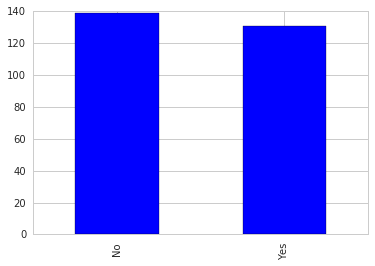

In [420]:
data.Hitters_Park.value_counts().plot(kind='bar')

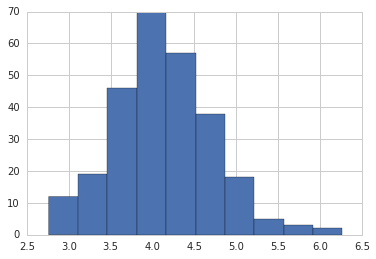

In [421]:
data.ERA.hist()

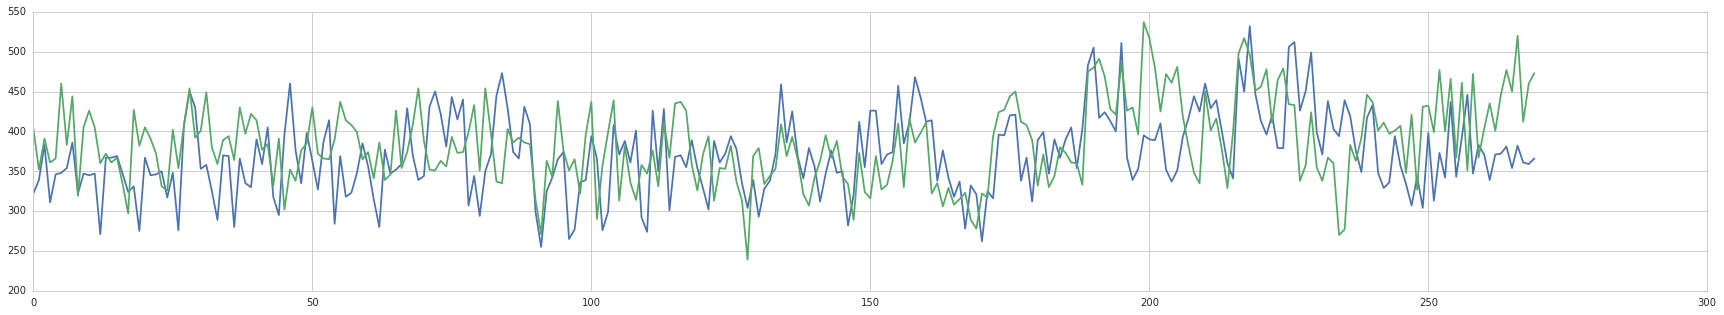

In [422]:
RA_RS = pd.DataFrame({'R-Allowed': data['R-Allowed'], 'R-Scored' : data['R']})
plt.figure(figsize=(30,5))
plt.plot(RA_RS)
plt.show()

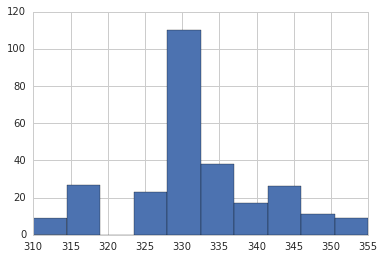

In [423]:
data.Left_Field.hist()

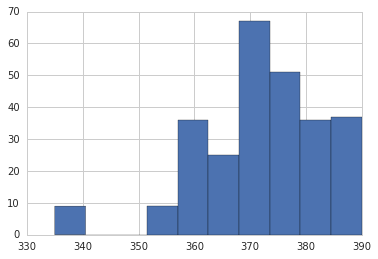

In [424]:
data.Left_Center.hist()

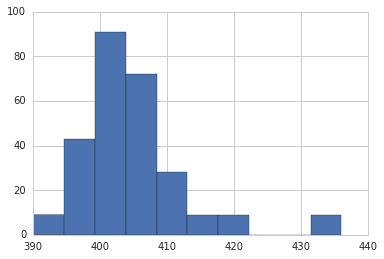

In [425]:
data.Center.hist()

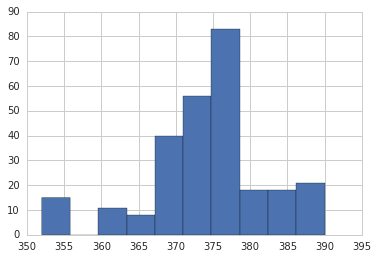

In [426]:
data.Right_Center.hist()

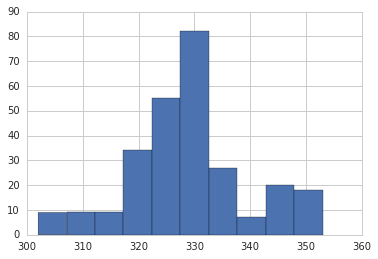

In [427]:
data.Right_Field.hist()

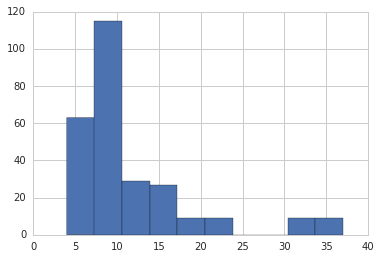

In [428]:
data.Left_Field_Wall.hist()

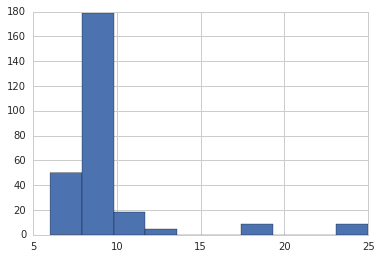

In [429]:
data.Center_Field_Wall.hist()

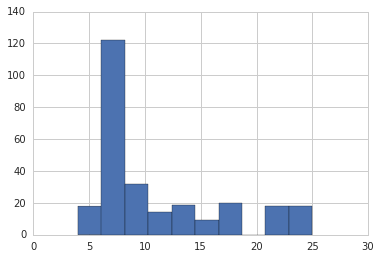

In [430]:
data.Right_Field_Wall.hist()

In [431]:
avgFair = data.Fair_Territory.mean()
avgFair

110.00988593155887

In [432]:
data.Fair_Territory = data.Fair_Territory.fillna(value=avgFair)

In [433]:
avgFoul = data.Foul_Territory.mean()
avgFoul

24.27870722433458

In [434]:
data.Foul_Territory = data.Foul_Territory.fillna(value=avgFoul)

In [435]:
data.drop(['Team'], axis=1, inplace=True)

In [436]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(data)

,ERA,TBF,H-Allowed,R-Allowed,HR-Allowed,AVG-Against,SLG-Against,PA,H,HR,R,RBI,AVG,SLG,Park_Factor,Hitters_Park,Home_Games,Away_Games,Runs_Scored_Away,Runs_Allowed_Away,Left_Field,Left_Center,Center,Right_Center,Right_Field,Left_Field_Wall,Center_Field_Wall,Right_Field_Wall,Backstop,Fair_Territory,Foul_Territory,High_Temp,Avg_Temp,Low_Temp,Max_Humidity,Avg_Humidity,Low_Humidity,High_Wind,Avg_Wind,Elevation
0,3.53,3123,687,322,71,0.242,0.372,3074,769,71,404,393,0.279,0.427,0.939198,No,81,81,447,326,330,387,400,370,330,5,8,18,59,106.700000,21.500000,77.706522,68.288043,59.739130,87.989130,70.108696,46.940217,10.282609,3.625000,157
1,3.77,3182,743,339,84,0.256,0.403,2989,718,68,352,332,0.267,0.406,0.852271,No,82,80,384,407,330,387,400,370,330,5,8,18,59,106.700000,21.500000,79.179348,69.815217,61.233696,88.684783,71.858696,50.304348,9.989130,3.527174,157
2,4.28,3241,772,383,94,0.261,0.417,3076,782,77,391,370,0.282,0.418,0.972362,No,81,81,445,351,330,387,400,370,330,5,8,18,59,106.700000,21.500000,80.885870,71.146739,62.315217,81.179348,63.076087,42.054348,10.152174,3.472826,157
3,3.46,3122,704,311,74,0.244,0.387,2993,729,71,361,347,0.268,0.406,0.918033,No,81,81,400,332,330,387,400,370,330,5,8,18,59,106.700000,21.500000,78.923913,69.418478,59.489130,84.163043,64.489130,44.336957,11.847826,4.298913,157
4,3.76,3124,727,346,72,0.253,0.392,3053,766,69,366,348,0.279,0.418,0.905852,No,81,81,400,386,330,387,400,370,330,5,8,18,59,106.700000,21.500000,81.875000,71.608696,61.728261,85.054348,65.157609,42.527174,10.782609,3.766304,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,3.97,3113,710,354,85,0.250,0.400,3097,770,111,450,436,0.284,0.470,0.900336,No,81,81,480,413,318,385,408,375,314,8,7,10,73,110.009886,24.278707,77.255435,70.086957,63.168478,75.739130,59.804348,43.239130,18.630435,9.668478,29
266,4.32,3178,749,382,81,0.260,0.412,3242,845,107,520,499,0.300,0.474,1.069988,Yes,81,81,448,395,318,385,408,375,314,8,7,10,73,110.009886,24.278707,77.565217,70.211957,62.364130,73.298913,56.586957,39.478261,19.918478,9.527174,29
267,4.11,3120,707,361,68,0.249,0.387,3087,773,92,412,393,0.281,0.440,1.040377,Yes,81,81,377,366,318,385,408,375,314,8,7,10,73,110.009886,24.278707,76.880435,69.668478,61.951087,76.032609,58.548913,40.565217,19.989130,9.777174,29
268,4.03,3208,706,359,101,0.245,0.404,3177,785,136,460,444,0.284,0.490,0.964664,No,81,81,455,394,318,382,408,360,314,8,8,8,52,108.800000,19.700000,74.483696,67.777174,60.565217,79.646739,63.168478,46.092391,20.010870,9.478261,29


In [437]:
data.drop(['Park_Factor'], axis=1, inplace=True)
data.drop(['Home_Games'], axis=1, inplace=True)
data.drop(['Away_Games'], axis=1, inplace=True)
data.drop(['Runs_Scored_Away'], axis=1, inplace=True)
data.drop(['Runs_Allowed_Away'], axis=1, inplace=True)
data.drop(['R-Allowed'], axis=1, inplace=True)
data.drop(['R'], axis = 1, inplace=True)

In [438]:
data.drop(['High_Temp'], axis=1, inplace=True)
data.drop(['Avg_Temp'], axis=1, inplace=True)
data.drop(['Low_Temp'], axis=1, inplace=True)
data.drop(['Max_Humidity'], axis=1, inplace=True)
data.drop(['Avg_Humidity'], axis=1, inplace=True)
data.drop(['Low_Humidity'], axis=1, inplace=True)
data.drop(['High_Wind'], axis=1, inplace=True)
data.drop(['Avg_Wind'], axis=1, inplace=True)
data.drop(['Elevation'], axis=1, inplace=True)

In [439]:
dummies = pd.get_dummies(data['Hitters_Park'], prefix='Hitters_Park')
y = dummies['Hitters_Park_Yes']

In [440]:
data.drop(['Hitters_Park'], axis=1, inplace=True)

In [441]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)

In [442]:
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt', 'log2']
min_samples_split = [3,5,7]

rfc = RandomForestClassifier(n_jobs=1)
estimator = GridSearchCV(rfc, dict(n_estimators=n_estimators, max_features=max_features, min_samples_split=min_samples_split)
                        ,cv=None, n_jobs=-1)

In [443]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [444]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [445]:
best_rfc = estimator.best_estimator_

In [446]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.703703703704


In [447]:
y_hat = best_rfc.predict(X_test)

In [448]:
y_hat

array([ 0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        1.,  1.])

In [449]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

        0.0       0.74      0.63      0.68        27
        1.0       0.68      0.78      0.72        27

avg / total       0.71      0.70      0.70        54



In [450]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[17 10]
 [ 6 21]]


In [451]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.750342935528


In [452]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, data, y, cv=10)

In [453]:
scores

array([ 0.64285714,  0.66666667,  0.66666667,  0.74074074,  0.77777778,
        0.7037037 ,  0.88888889,  0.92592593,  0.48148148,  0.53846154])

In [454]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci = 2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/- %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)
    

Score is 0.703317 +/- 0.094265
95 percent probability that if this experiment were repeated over and over the average score would be between 0.609052 and 0.797582


In [478]:
dataTest = pd.read_csv("Baseball Stats Final Project Test.csv")
dataTest

,Team,ERA,TBF,H-Allowed,R-Allowed,HR-Allowed,AVG-Against,SLG-Against,PA,H,...,Foul_Territory,Max_Temperature,Avg_Temperature,Min_Temperature,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind,Avg_Wind,Elevation
0,Angels,2.82,3085,618,251,39,0.221,0.327,2961,664,...,21.5,79.239130,70.059783,60.375000,83.168478,63.923913,44.173913,11.413043,3.521739,157
1,Angels,3.44,3003,638,309,79,0.230,0.367,2914,720,...,21.5,83.983696,74.260870,64.021739,76.304348,57.461957,38.135870,11.413043,3.331522,157
2,Angels,4.13,3227,745,371,80,0.254,0.397,3068,741,...,21.5,83.500000,74.244565,64.500000,75.217391,57.369565,38.994565,11.559783,3.554348,157
3,Angels,3.39,3164,672,310,55,0.231,0.341,3087,701,...,21.5,84.146739,74.298913,63.951087,78.027174,57.880435,37.201087,12.630435,4.070652,157
4,Angels,4.68,3006,713,377,96,0.259,0.434,2926,659,...,21.5,82.625000,73.630435,64.152174,79.609890,60.450549,40.686813,12.250000,3.880435,157
5,Astros,2.83,3074,642,253,56,0.225,0.338,3059,727,...,21.0,88.000000,83.532609,72.266304,86.500000,61.782609,36.619565,21.244565,6.896739,43
6,Astros,3.81,3180,726,355,79,0.250,0.396,2988,636,...,21.0,88.000000,81.032609,71.380435,91.163043,69.184783,46.679348,18.081522,5.538043,43
7,Astros,4.99,3334,801,457,106,0.270,0.449,2983,627,...,21.0,88.000000,79.951087,69.885870,93.744565,70.777174,47.369565,19.728261,6.125000,43
8,Astros,4.04,3136,726,362,73,0.253,0.398,2978,655,...,21.0,88.000000,79.434783,70.027174,93.527174,72.000000,50.000000,18.885870,6.114130,43
9,Astros,3.95,2958,662,337,78,0.245,0.393,2917,658,...,21.0,88.000000,80.722826,71.380435,94.956522,74.010870,52.521739,18.434783,5.592391,43


In [479]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(dataTest)

,Team,ERA,TBF,H-Allowed,R-Allowed,HR-Allowed,AVG-Against,SLG-Against,PA,H,HR,R,RBI,AVG,SLG,Park_Factor,Hitters_Park,Home_Games,Away_Games,Runs_Scored_Away,Runs_Allowed_Away,Left_Field,Left_Center,Center,Right_Center,Right_Field,Left_Field_Wall,Center_Field_Wall,Right_Field_Wall,Backstop,Fair_Territory,Foul_Territory,Max_Temperature,Avg_Temperature,Min_Temperature,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind,Avg_Wind,Elevation
0,Angels,2.82,3085,618,251,39,0.221,0.327,2961,664,62,305,284,0.248,0.377,0.785311,No,81,81,362,346,330,387,400,370,330,5,8,18,59,106.7,21.5,79.239130,70.059783,60.375000,83.168478,63.923913,44.173913,11.413043,3.521739,157
1,Angels,3.44,3003,638,309,79,0.230,0.367,2914,720,82,348,336,0.272,0.428,0.812114,No,81,81,419,390,330,387,400,370,330,5,8,18,59,106.7,21.5,83.983696,74.260870,64.021739,76.304348,57.461957,38.135870,11.413043,3.331522,157
2,Angels,4.13,3227,745,371,80,0.254,0.397,3068,741,77,352,335,0.271,0.415,0.967871,No,81,81,381,366,330,387,400,370,330,5,8,18,59,106.7,21.5,83.500000,74.244565,64.500000,75.217391,57.369565,38.994565,11.559783,3.554348,157
3,Angels,3.39,3164,672,310,55,0.231,0.341,3087,701,73,362,341,0.252,0.388,0.919289,No,81,81,411,320,330,387,400,370,330,5,8,18,59,106.7,21.5,84.146739,74.298913,63.951087,78.027174,57.880435,37.201087,12.630435,4.070652,157
4,Angels,4.68,3006,713,377,96,0.259,0.434,2926,659,94,320,301,0.250,0.409,0.970752,No,81,81,341,377,330,387,400,370,330,5,8,18,59,106.7,21.5,82.625000,73.630435,64.152174,79.609890,60.450549,40.686813,12.250000,3.880435,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Yankees,4.73,3269,797,422,108,0.268,0.452,3126,744,122,471,459,0.274,0.467,1.248951,Yes,81,81,396,319,318,382,408,360,314,8,8,8,52,108.8,19.7,76.679348,69.663043,62.097826,82.331522,65.048913,47.277174,19.298913,9.250000,29
146,Yankees,3.67,3063,668,327,94,0.237,0.400,3004,709,138,406,394,0.266,0.469,1.195759,Yes,81,81,272,341,318,382,408,360,314,8,8,8,52,108.8,19.7,77.815217,70.989130,63.652174,77.793478,60.864130,43.440217,19.472826,9.250000,29
147,Yankees,4.10,3121,759,351,92,0.263,0.424,2944,659,75,337,324,0.252,0.387,1.086888,Yes,81,81,313,320,318,382,408,360,314,8,8,8,52,108.8,19.7,76.652174,69.543478,61.934783,76.500000,59.347826,41.750000,19.586957,9.494565,29
148,Yankees,3.66,3115,712,326,97,0.247,0.402,2965,662,88,304,286,0.247,0.396,0.944528,No,81,81,329,338,318,382,408,360,314,8,8,8,52,108.8,19.7,75.750000,68.543478,60.793478,76.831522,59.961957,42.635870,19.570652,9.478261,29


In [480]:
y_Team = dataTest['Team']
dataTest.drop(['Team'], axis=1, inplace=True)
dataTest.drop(['Park_Factor'], axis=1, inplace=True)
dataTest.drop(['Home_Games'], axis=1, inplace=True)
dataTest.drop(['Away_Games'], axis=1, inplace=True)
dataTest.drop(['Runs_Scored_Away'], axis=1, inplace=True)
dataTest.drop(['R-Allowed'], axis=1, inplace=True)
dataTest.drop(['R'], axis=1, inplace=True)
dataTest.drop(['Runs_Allowed_Away'], axis=1, inplace=True)

In [481]:
dataTest.drop(['Max_Temperature'], axis=1, inplace=True)
dataTest.drop(['Avg_Temperature'], axis=1, inplace=True)
dataTest.drop(['Min_Temperature'], axis=1, inplace=True)
dataTest.drop(['Max_Humidity'], axis=1, inplace=True)
dataTest.drop(['Mean_Humidity'], axis=1, inplace=True)
dataTest.drop(['Min_Humidity'], axis=1, inplace=True)
dataTest.drop(['Max_Wind'], axis=1, inplace=True)
dataTest.drop(['Avg_Wind'], axis=1, inplace=True)

In [482]:
dummies = pd.get_dummies(dataTest['Hitters_Park'], prefix='Hitters_Park')
dummies

,Hitters_Park_No,Hitters_Park_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,0,1
8,0,1
9,0,1


In [483]:
yTest = dummies.pop('Hitters_Park_Yes')

In [484]:
dataTest.drop(['Hitters_Park'], axis=1, inplace=True)

In [488]:
dataTest.drop(['Elevation'], axis=1, inplace=True)

In [489]:
accuracy = accuracy_score(yTest, best_rfc.predict(dataTest))
print "Accuracy: ", accuracy

Accuracy:  0.673333333333


In [556]:
from pandas import DataFrame
df = DataFrame({'Team': y_Team, 'Hitters_Park': yTest, 'Prediction': best_rfc.predict(dataTest)})

In [557]:
columns = ['Team', 'Formula', 'Prediction']
graph = pd.DataFrame(columns = columns)

In [558]:
graph.loc[0] = ['Angels', sum(df[df.Team == 'Angels'].Hitters_Park)/5, sum(df[df.Team == 'Angels'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0,0.2


In [559]:
df[df.Team == 'Angels']

,Hitters_Park,Prediction,Team
0,0,0,Angels
1,0,0,Angels
2,0,0,Angels
3,0,0,Angels
4,0,1,Angels


In [560]:
graph.loc[1] = ['Astros', sum(df[df.Team == 'Astros'].Hitters_Park)/5, sum(df[df.Team == 'Astros'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4


In [561]:
df[df.Team == 'Astros']

,Hitters_Park,Prediction,Team
5,0,0,Astros
6,0,0,Astros
7,1,1,Astros
8,1,0,Astros
9,1,1,Astros


In [562]:
graph.loc[2] = ['Athletics', sum(df[df.Team == 'Athletics'].Hitters_Park)/5, sum(df[df.Team == 'Athletics'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2


In [563]:
df[df.Team == 'Athletics']

,Hitters_Park,Prediction,Team
10,0,0,Athletics
11,0,0,Athletics
12,0,0,Athletics
13,1,0,Athletics
14,1,1,Athletics


In [564]:
graph.loc[3] = ['Blue Jays', sum(df[df.Team == 'Blue Jays'].Hitters_Park)/5, sum(df[df.Team == 'Blue Jays'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4


In [565]:
df[df.Team == 'Blue Jays']

,Hitters_Park,Prediction,Team
15,0,0,Blue Jays
16,0,1,Blue Jays
17,1,0,Blue Jays
18,1,0,Blue Jays
19,1,1,Blue Jays


In [566]:
graph.loc[4] = ['Braves', sum(df[df.Team == 'Braves'].Hitters_Park)/5, sum(df[df.Team == 'Braves'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2


In [567]:
df[df.Team == 'Braves']

,Hitters_Park,Prediction,Team
20,0,0,Braves
21,1,0,Braves
22,0,0,Braves
23,0,0,Braves
24,0,1,Braves


In [568]:
graph.loc[5] = ['Brewers', sum(df[df.Team == 'Brewers'].Hitters_Park)/5, sum(df[df.Team == 'Brewers'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2


In [569]:
df[df.Team == 'Brewers']

,Hitters_Park,Prediction,Team
25,1,0,Brewers
26,1,1,Brewers
27,1,0,Brewers
28,1,0,Brewers
29,1,0,Brewers


In [570]:
graph.loc[6] = ['Cardinals', sum(df[df.Team == 'Cardinals'].Hitters_Park)/5, sum(df[df.Team == 'Brewers'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2


In [571]:
df[df.Team == 'Cardinals']

,Hitters_Park,Prediction,Team
30,0,0,Cardinals
31,0,0,Cardinals
32,0,0,Cardinals
33,1,0,Cardinals
34,0,0,Cardinals


In [572]:
graph.loc[7] = ['Cubs', sum(df[df.Team == 'Cubs'].Hitters_Park)/5, sum(df[df.Team == 'Cubs'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0


In [573]:
df[df.Team == 'Cubs']

,Hitters_Park,Prediction,Team
35,0,0,Cubs
36,0,0,Cubs
37,1,0,Cubs
38,0,0,Cubs
39,0,0,Cubs


In [574]:
graph.loc[8] = ['Diamondbacks', sum(df[df.Team == 'Diamondbacks'].Hitters_Park)/5, sum(df[df.Team == 'Diamondbacks'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2


In [575]:
df[df.Team == 'Diamondbacks']

,Hitters_Park,Prediction,Team
40,1,0,Diamondbacks
41,1,1,Diamondbacks
42,0,0,Diamondbacks
43,1,0,Diamondbacks
44,1,0,Diamondbacks


In [576]:
graph.loc[9] = ['Dodgers', sum(df[df.Team == 'Dodgers'].Hitters_Park)/5, sum(df[df.Team == 'Dodgers'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [577]:
df[df.Team == 'Dodgers']

,Hitters_Park,Prediction,Team
45,0,0,Dodgers
46,0,0,Dodgers
47,0,0,Dodgers
48,0,0,Dodgers
49,1,0,Dodgers


In [578]:
graph.loc[10] = ['Giants', sum(df[df.Team == 'Giants'].Hitters_Park)/5, sum(df[df.Team == 'Giants'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [579]:
df[df.Team == 'Giants']

,Hitters_Park,Prediction,Team
50,0,0,Giants
51,0,0,Giants
52,0,0,Giants
53,0,0,Giants
54,0,0,Giants


In [580]:
graph.loc[11] = ['Indians', sum(df[df.Team == 'Indians'].Hitters_Park)/5, sum(df[df.Team == 'Indians'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [581]:
df[df.Team == 'Indians']

,Hitters_Park,Prediction,Team
55,0,0,Indians
56,0,0,Indians
57,0,0,Indians
58,0,0,Indians
59,1,0,Indians


In [582]:
graph.loc[12] = ['Mariners', sum(df[df.Team == 'Mariners'].Hitters_Park)/5, sum(df[df.Team == 'Mariners'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [583]:
df[df.Team == 'Mariners']

,Hitters_Park,Prediction,Team
60,0,0,Mariners
61,0,0,Mariners
62,0,0,Mariners
63,0,0,Mariners
64,0,1,Mariners


In [584]:
graph.loc[13] = ['Marlins', sum(df[df.Team == 'Marlins'].Hitters_Park)/5, sum(df[df.Team == 'Marlins'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [585]:
df[df.Team == 'Marlins']

,Hitters_Park,Prediction,Team
65,1,0,Marlins
66,0,0,Marlins
67,1,0,Marlins
68,1,0,Marlins
69,0,0,Marlins


In [586]:
graph.loc[14] = ['Mets', sum(df[df.Team == 'Mets'].Hitters_Park)/5, sum(df[df.Team == 'Mets'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [587]:
df[df.Team == 'Mets']

,Hitters_Park,Prediction,Team
70,0,0,Mets
71,0,0,Mets
72,0,0,Mets
73,0,0,Mets
74,0,0,Mets


In [588]:
graph.loc[15] = ['Nationals', sum(df[df.Team == 'Nationals'].Hitters_Park)/5, sum(df[df.Team == 'Nationals'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [589]:
df[df.Team == 'Nationals']

,Hitters_Park,Prediction,Team
75,1,0,Nationals
76,1,0,Nationals
77,1,0,Nationals
78,1,0,Nationals
79,1,0,Nationals


In [590]:
graph.loc[16] = ['Orioles', sum(df[df.Team == 'Orioles'].Hitters_Park)/5, sum(df[df.Team == 'Orioles'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [591]:
df[df.Team == 'Orioles']

,Hitters_Park,Prediction,Team
80,0,0,Orioles
81,1,1,Orioles
82,1,1,Orioles
83,0,0,Orioles
84,1,1,Orioles


In [592]:
graph.loc[17] = ['Padres', sum(df[df.Team == 'Padres'].Hitters_Park)/5, sum(df[df.Team == 'Padres'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [593]:
df[df.Team == 'Padres']

,Hitters_Park,Prediction,Team
85,0,0,Padres
86,0,0,Padres
87,0,0,Padres
88,0,0,Padres
89,0,0,Padres


In [594]:
graph.loc[18] = ['Phillies', sum(df[df.Team == 'Phillies'].Hitters_Park)/5, sum(df[df.Team == 'Phillies'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [595]:
df[df.Team == 'Phillies']

,Hitters_Park,Prediction,Team
90,1,1,Phillies
91,0,0,Phillies
92,1,0,Phillies
93,0,0,Phillies
94,1,1,Phillies


In [596]:
graph.loc[19] = ['Pirates', sum(df[df.Team == 'Pirates'].Hitters_Park)/5, sum(df[df.Team == 'Pirates'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [597]:
df[df.Team == 'Pirates']

,Hitters_Park,Prediction,Team
95,0,0,Pirates
96,0,0,Pirates
97,0,0,Pirates
98,0,0,Pirates
99,0,0,Pirates


In [598]:
graph.loc[20] = ['Rangers', sum(df[df.Team == 'Rangers'].Hitters_Park)/5, sum(df[df.Team == 'Rangers'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [599]:
df[df.Team == 'Rangers']

,Hitters_Park,Prediction,Team
100,1,1,Rangers
101,1,1,Rangers
102,0,0,Rangers
103,1,0,Rangers
104,1,1,Rangers


In [600]:
graph.loc[21] = ['Rays', sum(df[df.Team == 'Rays'].Hitters_Park)/5, sum(df[df.Team == 'Rays'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [601]:
df[df.Team == 'Rays']

,Hitters_Park,Prediction,Team
105,0,0,Rays
106,0,0,Rays
107,0,0,Rays
108,1,0,Rays
109,0,0,Rays


In [602]:
graph.loc[22] = ['Red Sox', sum(df[df.Team == 'Red Sox'].Hitters_Park)/5, sum(df[df.Team == 'Red Sox'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [603]:
df[df.Team == 'Red Sox']

,Hitters_Park,Prediction,Team
110,1,1,Red Sox
111,1,1,Red Sox
112,0,1,Red Sox
113,1,0,Red Sox
114,1,1,Red Sox


In [604]:
graph.loc[23] = ['Reds', sum(df[df.Team == 'Reds'].Hitters_Park)/5, sum(df[df.Team == 'Reds'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [605]:
df[df.Team == 'Reds']

,Hitters_Park,Prediction,Team
115,1,1,Reds
116,1,0,Reds
117,1,0,Reds
118,0,0,Reds
119,1,0,Reds


In [606]:
graph.loc[24] = ['Rockies', sum(df[df.Team == 'Rockies'].Hitters_Park)/5, sum(df[df.Team == 'Rockies'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [607]:
df[df.Team == 'Rockies']

,Hitters_Park,Prediction,Team
120,1,1,Rockies
121,1,1,Rockies
122,1,1,Rockies
123,1,1,Rockies
124,1,1,Rockies


In [608]:
graph.loc[25] = ['Royals', sum(df[df.Team == 'Royals'].Hitters_Park)/5, sum(df[df.Team == 'Royals'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [609]:
df[df.Team == 'Royals']

,Hitters_Park,Prediction,Team
125,1,1,Royals
126,1,0,Royals
127,1,0,Royals
128,1,0,Royals
129,1,0,Royals


In [610]:
graph.loc[26] = ['Tigers', sum(df[df.Team == 'Tigers'].Hitters_Park)/5, sum(df[df.Team == 'Tigers'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [611]:
df[df.Team == 'Tigers']

,Hitters_Park,Prediction,Team
130,1,1,Tigers
131,1,0,Tigers
132,1,0,Tigers
133,1,0,Tigers
134,0,1,Tigers


In [612]:
graph.loc[27] = ['Twins', sum(df[df.Team == 'Twins'].Hitters_Park)/5, sum(df[df.Team == 'Twins'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [613]:
df[df.Team == 'Twins']

,Hitters_Park,Prediction,Team
135,0,1,Twins
136,1,1,Twins
137,1,0,Twins
138,1,1,Twins
139,1,1,Twins


In [614]:
graph.loc[28] = ['White Sox', sum(df[df.Team == 'White Sox'].Hitters_Park)/5,sum(df[df.Team == 'White Sox'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [615]:
df[df.Team == 'White Sox']

,Hitters_Park,Prediction,Team
140,1,1,White Sox
141,1,1,White Sox
142,0,0,White Sox
143,1,0,White Sox
144,0,0,White Sox


In [616]:
graph.loc[29] = ['Yankees', sum(df[df.Team == 'Yankees'].Hitters_Park)/5, sum(df[df.Team == 'Yankees'].Prediction)/5]
graph

,Team,Formula,Prediction
0,Angels,0.0,0.2
1,Astros,0.6,0.4
2,Athletics,0.4,0.2
3,Blue Jays,0.6,0.4
4,Braves,0.2,0.2
5,Brewers,1.0,0.2
6,Cardinals,0.2,0.2
7,Cubs,0.2,0.0
8,Diamondbacks,0.8,0.2
9,Dodgers,0.2,0.0


In [617]:
df[df.Team == 'Yankees']

,Hitters_Park,Prediction,Team
145,1,1,Yankees
146,1,1,Yankees
147,1,0,Yankees
148,0,0,Yankees
149,0,1,Yankees


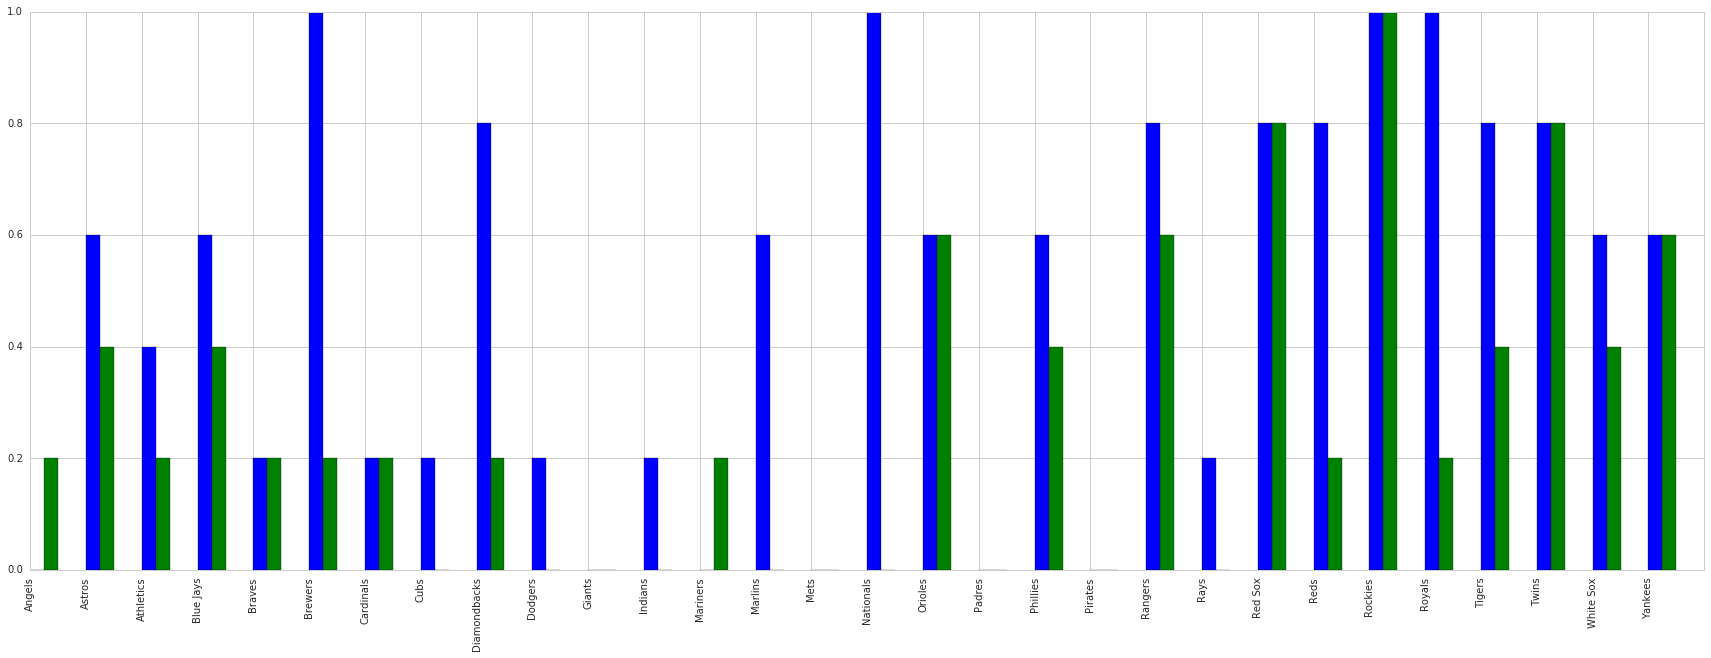

In [618]:
X = np.arange(30)
plt.figure(figsize(30,10))
plt.bar(X + 0.00, graph['Formula'], color = 'b', width = 0.25)
plt.bar(X + 0.25, graph['Prediction'], color = 'g', width = 0.25)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29],graph['Team'])
plt.xticks(rotation=90)
plt.show()

In [554]:
from pandas import DataFrame
df = DataFrame({'Team': graph['Team'], 'Formula': graph['Formula'], 'Prediction': graph['Prediction']})
df.to_excel('BaseballStatsPrediction.xlsx', sheet_name='sheet1', index=False)

In [619]:
data = pd.read_csv("Baseball Stats Final Project.csv")

In [620]:
avgFair = data.Fair_Territory.mean()
avgFair

110.00988593155887

In [621]:
data.Fair_Territory = data.Fair_Territory.fillna(value=avgFair)

In [622]:
avgFoul = data.Foul_Territory.mean()
avgFoul

24.27870722433458

In [623]:
data.Foul_Territory = data.Foul_Territory.fillna(value=avgFoul)

In [624]:
data.drop(['Team'], axis=1, inplace=True)

In [625]:
data.drop(['Park_Factor'], axis=1, inplace=True)
data.drop(['Home_Games'], axis=1, inplace=True)
data.drop(['Away_Games'], axis=1, inplace=True)
data.drop(['Runs_Scored_Away'], axis=1, inplace=True)
data.drop(['Runs_Allowed_Away'], axis=1, inplace=True)
data.drop(['R-Allowed'], axis=1, inplace=True)
data.drop(['R'], axis = 1, inplace=True)

In [626]:
dummies = pd.get_dummies(data['Hitters_Park'], prefix='Hitters_Park')
y = dummies['Hitters_Park_Yes']

In [627]:
data.drop(['Hitters_Park'], axis=1, inplace=True)

In [647]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)

In [648]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [649]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [650]:
best_rfc = estimator.best_estimator_

In [651]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.722222222222


In [652]:
y_hat = best_rfc.predict(X_test)
y_hat

array([ 0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        1.,  1.])

In [653]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

        0.0       0.75      0.67      0.71        27
        1.0       0.70      0.78      0.74        27

avg / total       0.72      0.72      0.72        54



In [654]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[18  9]
 [ 6 21]]


In [655]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.799725651578


In [656]:
scores = cross_validation.cross_val_score(best_rfc, data, y, cv=10)
scores

array([ 0.64285714,  0.59259259,  0.62962963,  0.74074074,  0.7037037 ,
        0.66666667,  0.96296296,  0.88888889,  0.48148148,  0.57692308])

In [657]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci = 2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/- %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)
    

Score is 0.688645 +/- 0.098332
95 percent probability that if this experiment were repeated over and over the average score would be between 0.590313 and 0.786977


In [658]:
dataTest = pd.read_csv("Baseball Stats Final Project Test.csv")
dataTest

,Team,ERA,TBF,H-Allowed,R-Allowed,HR-Allowed,AVG-Against,SLG-Against,PA,H,...,Foul_Territory,Max_Temperature,Avg_Temperature,Min_Temperature,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind,Avg_Wind,Elevation
0,Angels,2.82,3085,618,251,39,0.221,0.327,2961,664,...,21.5,79.239130,70.059783,60.375000,83.168478,63.923913,44.173913,11.413043,3.521739,157
1,Angels,3.44,3003,638,309,79,0.230,0.367,2914,720,...,21.5,83.983696,74.260870,64.021739,76.304348,57.461957,38.135870,11.413043,3.331522,157
2,Angels,4.13,3227,745,371,80,0.254,0.397,3068,741,...,21.5,83.500000,74.244565,64.500000,75.217391,57.369565,38.994565,11.559783,3.554348,157
3,Angels,3.39,3164,672,310,55,0.231,0.341,3087,701,...,21.5,84.146739,74.298913,63.951087,78.027174,57.880435,37.201087,12.630435,4.070652,157
4,Angels,4.68,3006,713,377,96,0.259,0.434,2926,659,...,21.5,82.625000,73.630435,64.152174,79.609890,60.450549,40.686813,12.250000,3.880435,157
5,Astros,2.83,3074,642,253,56,0.225,0.338,3059,727,...,21.0,88.000000,83.532609,72.266304,86.500000,61.782609,36.619565,21.244565,6.896739,43
6,Astros,3.81,3180,726,355,79,0.250,0.396,2988,636,...,21.0,88.000000,81.032609,71.380435,91.163043,69.184783,46.679348,18.081522,5.538043,43
7,Astros,4.99,3334,801,457,106,0.270,0.449,2983,627,...,21.0,88.000000,79.951087,69.885870,93.744565,70.777174,47.369565,19.728261,6.125000,43
8,Astros,4.04,3136,726,362,73,0.253,0.398,2978,655,...,21.0,88.000000,79.434783,70.027174,93.527174,72.000000,50.000000,18.885870,6.114130,43
9,Astros,3.95,2958,662,337,78,0.245,0.393,2917,658,...,21.0,88.000000,80.722826,71.380435,94.956522,74.010870,52.521739,18.434783,5.592391,43


In [659]:
dataTest.describe()

,ERA,TBF,H-Allowed,R-Allowed,HR-Allowed,AVG-Against,SLG-Against,PA,H,HR,...,Foul_Territory,Max_Temperature,Avg_Temperature,Min_Temperature,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind,Avg_Wind,Elevation
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,3.837533,3108.480000,705.153333,340.593333,77.426667,0.247807,0.394100,3014.653333,695.633333,77.766667,...,23.503333,78.286746,69.791527,61.072107,81.691903,63.788881,44.588221,16.465667,7.098636,533.963333
std,0.599259,84.551856,53.518201,48.808638,17.135601,0.015563,0.034619,64.917603,57.681772,21.442108,...,4.175390,7.070370,6.553686,6.606318,11.411315,9.510606,8.946571,4.702930,2.598741,932.446025
min,2.560000,2875.000000,583.000000,236.000000,37.000000,0.215000,0.312000,2846.000000,571.000000,31.000000,...,18.100000,66.211957,58.701087,48.592391,35.695652,23.788043,11.347826,0.000000,0.000000,5.900000
25%,3.372500,3054.250000,670.500000,304.750000,65.250000,0.237000,0.369000,2965.250000,659.000000,62.000000,...,21.000000,73.399457,65.196638,56.451087,80.438859,61.373641,40.744565,14.277174,5.813859,39.000000
50%,3.830000,3114.000000,701.000000,338.000000,77.000000,0.248500,0.396000,3008.500000,690.500000,76.000000,...,23.600000,76.652174,69.019022,60.062500,84.084239,65.220109,45.445652,17.372283,7.543478,357.000000
75%,4.230000,3162.750000,739.000000,373.500000,90.000000,0.257750,0.422000,3067.750000,722.750000,90.000000,...,25.000000,81.607337,72.402174,64.107337,86.615489,69.229620,50.044837,19.582880,8.994565,617.000000
max,5.970000,3336.000000,909.000000,523.000000,119.000000,0.299000,0.502000,3175.000000,924.000000,138.000000,...,40.700000,100.543478,89.108696,77.184783,97.918478,80.385870,58.184783,26.385870,12.923913,5200.000000


In [660]:
y_Team = dataTest['Team']
dataTest.drop(['Team'], axis=1, inplace=True)
dataTest.drop(['Park_Factor'], axis=1, inplace=True)
dataTest.drop(['Home_Games'], axis=1, inplace=True)
dataTest.drop(['Away_Games'], axis=1, inplace=True)
dataTest.drop(['Runs_Scored_Away'], axis=1, inplace=True)
dataTest.drop(['R-Allowed'], axis=1, inplace=True)
dataTest.drop(['R'], axis=1, inplace=True)

In [661]:
dummies = pd.get_dummies(dataTest['Hitters_Park'], prefix='Hitters_Park')
dummies

,Hitters_Park_No,Hitters_Park_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,0,1
8,0,1
9,0,1


In [662]:
yTest = dummies.pop('Hitters_Park_Yes')

In [663]:
dataTest.drop(['Hitters_Park'], axis=1, inplace=True)

In [665]:
dataTest.drop(['Runs_Allowed_Away'], axis=1, inplace=True)

In [666]:
accuracy = accuracy_score(yTest, best_rfc.predict(dataTest))
print "Accuracy: ", accuracy

Accuracy:  0.68


In [667]:
from pandas import DataFrame
df = DataFrame({'Team': y_Team, 'Hitters_Park': yTest, 'Prediction': best_rfc.predict(dataTest)})

In [668]:
columns = ['Team', 'Formula', 'Prediction']
graph = pd.DataFrame(columns = columns)

In [669]:
graph.loc[0] = ['Angels', sum(df[df.Team == 'Angels'].Hitters_Park)/5*100, sum(df[df.Team == 'Angels'].Prediction)/5*100]
graph.loc[1] = ['Astros', sum(df[df.Team == 'Astros'].Hitters_Park)/5*100, sum(df[df.Team == 'Astros'].Prediction)/5*100]
graph.loc[2] = ['Athletics', sum(df[df.Team == 'Athletics'].Hitters_Park)/5*100, sum(df[df.Team == 'Athletics'].Prediction)/5*100]
graph.loc[3] = ['Blue Jays', sum(df[df.Team == 'Blue Jays'].Hitters_Park)/5*100, sum(df[df.Team == 'Blue Jays'].Prediction)/5*100]
graph.loc[4] = ['Braves', sum(df[df.Team == 'Braves'].Hitters_Park)/5*100, sum(df[df.Team == 'Braves'].Prediction)/5*100]
graph.loc[5] = ['Brewers', sum(df[df.Team == 'Brewers'].Hitters_Park)/5*100, sum(df[df.Team == 'Brewers'].Prediction)/5*100]
graph.loc[6] = ['Cardinals', sum(df[df.Team == 'Cardinals'].Hitters_Park)/5*100, sum(df[df.Team == 'Cardinals'].Prediction)/5*100]
graph.loc[7] = ['Cubs', sum(df[df.Team == 'Cubs'].Hitters_Park)/5*100, sum(df[df.Team == 'Cubs'].Prediction)/5*100]
graph.loc[8] = ['Diamondsbacks', sum(df[df.Team == 'Diamondbacks'].Hitters_Park)/5*100, sum(df[df.Team == 'Diamondbacks'].Prediction)/5*100]
graph.loc[9] = ['Dodgers', sum(df[df.Team == 'Dodgers'].Hitters_Park)/5*100, sum(df[df.Team == 'Dodgers'].Prediction)/5*100]
graph.loc[10] = ['Giants', sum(df[df.Team == 'Giants'].Hitters_Park)/5*100, sum(df[df.Team == 'Giants'].Prediction)/5*100]
graph.loc[11] = ['Indians', sum(df[df.Team == 'Indians'].Hitters_Park)/5*100, sum(df[df.Team == 'Indians'].Prediction)/5*100]
graph.loc[12] = ['Mariners', sum(df[df.Team == 'Mariners'].Hitters_Park)/5*100, sum(df[df.Team == 'Mariners'].Prediction)/5*100]
graph.loc[13] = ['Marlins', sum(df[df.Team == 'Marlins'].Hitters_Park)/5*100, sum(df[df.Team == 'Marlins'].Prediction)/5*100]
graph.loc[14] = ['Mets', sum(df[df.Team == 'Mets'].Hitters_Park)/5*100, sum(df[df.Team == 'Mets'].Prediction)/5*100]
graph.loc[15] = ['Nationals', sum(df[df.Team == 'Nationals'].Hitters_Park)/5*100, sum(df[df.Team == 'Nationals'].Prediction)/5*100]
graph.loc[16] = ['Orioles', sum(df[df.Team == 'Orioles'].Hitters_Park)/5*100, sum(df[df.Team == 'Orioles'].Prediction)/5*100]
graph.loc[17] = ['Padres', sum(df[df.Team == 'Padres'].Hitters_Park)/5*100, sum(df[df.Team == 'Padres'].Prediction)/5*100]
graph.loc[18] = ['Phillies', sum(df[df.Team == 'Phillies'].Hitters_Park)/5*100, sum(df[df.Team == 'Phillies'].Prediction)/5*100]
graph.loc[19] = ['Pirates', sum(df[df.Team == 'Pirates'].Hitters_Park)/5*100, sum(df[df.Team == 'Pirates'].Prediction)/5*100]
graph.loc[20] = ['Rangers', sum(df[df.Team == 'Rangers'].Hitters_Park)/5*100, sum(df[df.Team == 'Rangers'].Prediction)/5*100]
graph.loc[21] = ['Rays', sum(df[df.Team == 'Rays'].Hitters_Park)/5*100, sum(df[df.Team == 'Rays'].Prediction)/5*100]
graph.loc[22] = ['Red Sox', sum(df[df.Team == 'Red Sox'].Hitters_Park)/5*100, sum(df[df.Team == 'Red Sox'].Prediction)/5*100]
graph.loc[23] = ['Reds', sum(df[df.Team == 'Reds'].Hitters_Park)/5*100, sum(df[df.Team == 'Reds'].Prediction)/5*100]
graph.loc[24] = ['Rockies', sum(df[df.Team == 'Rockies'].Hitters_Park)/5*100, sum(df[df.Team == 'Rockies'].Prediction)/5*100]
graph.loc[25] = ['Royals', sum(df[df.Team == 'Royals'].Hitters_Park)/5*100, sum(df[df.Team == 'Royals'].Prediction)/5*100]
graph.loc[26] = ['Tigers', sum(df[df.Team == 'Tigers'].Hitters_Park)/5*100, sum(df[df.Team == 'Tigers'].Prediction)/5*100]
graph.loc[27] = ['Twins', sum(df[df.Team == 'Twins'].Hitters_Park)/5*100, sum(df[df.Team == 'Twins'].Prediction)/5*100]
graph.loc[28] = ['White Sox', sum(df[df.Team == 'White Sox'].Hitters_Park)/5*100, sum(df[df.Team == 'White Sox'].Prediction)/5*100]
graph.loc[29] = ['Yankees', sum(df[df.Team == 'Yankees'].Hitters_Park)/5*100, sum(df[df.Team == 'Yankees'].Prediction)/5*100]
graph

,Team,Formula,Prediction
0,Angels,0,20
1,Astros,60,40
2,Athletics,40,0
3,Blue Jays,60,40
4,Braves,20,20
5,Brewers,100,20
6,Cardinals,20,20
7,Cubs,20,0
8,Diamondsbacks,80,100
9,Dodgers,20,0


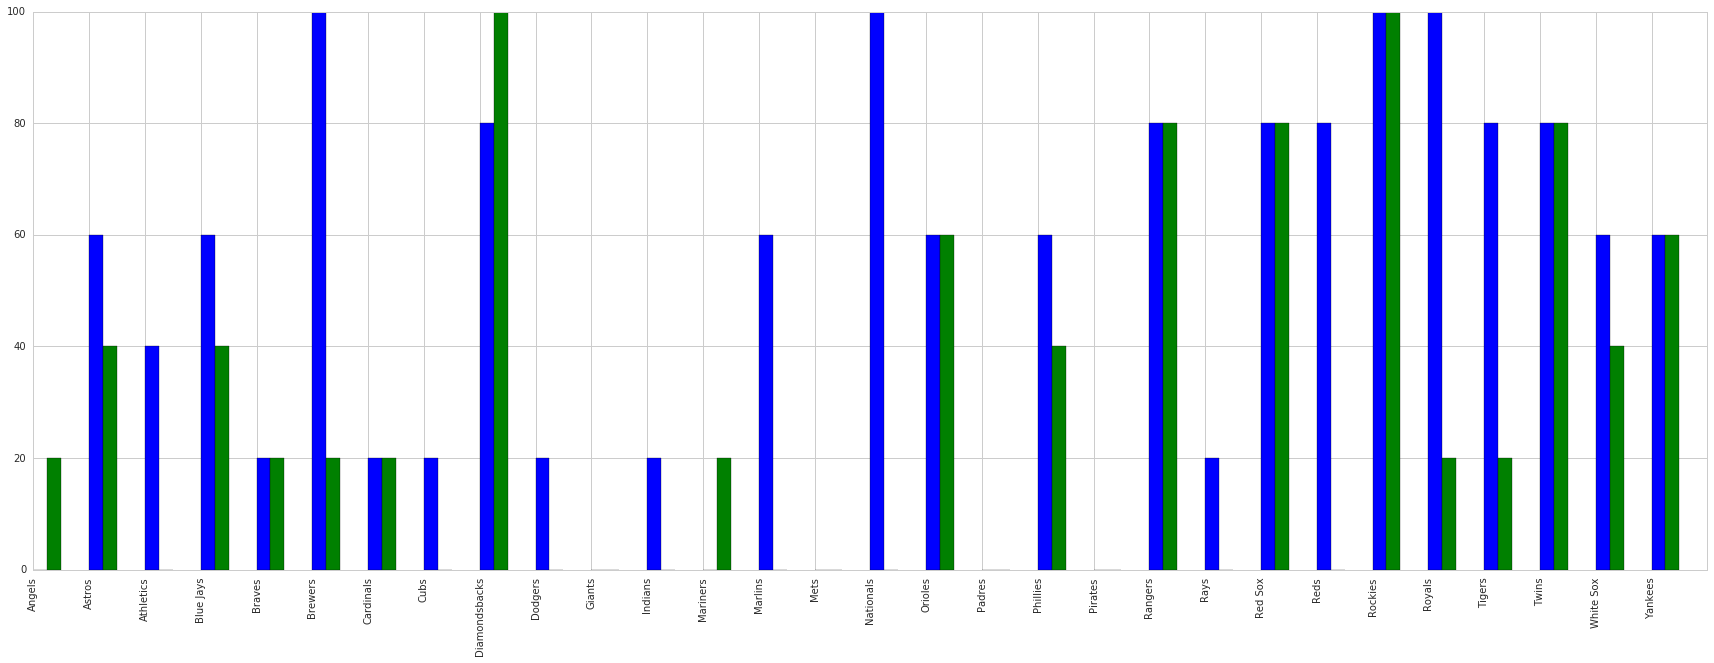

In [670]:
X = np.arange(30)
plt.figure(figsize(30,10))
plt.bar(X + 0.00, graph['Formula'], color = 'b', width = 0.25)
plt.bar(X + 0.25, graph['Prediction'], color = 'g', width = 0.25)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29],graph['Team'])
plt.xticks(rotation=90)
plt.show()

In [315]:
from pandas import DataFrame
df = DataFrame({'Team': graph['Team'], 'Formula': graph['Formula'], 'Prediction': graph['Prediction']})
df.to_excel('BaseballStatsPrediction.xlsx', sheet_name='sheet1', index=False)

In [671]:
data = pd.read_csv("Baseball Stats Final Project.csv")

In [672]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(data.describe())

,ERA,TBF,H-Allowed,R-Allowed,HR-Allowed,AVG-Against,SLG-Against,PA,H,HR,R,RBI,AVG,SLG,Park_Factor,Home_Games,Away_Games,Runs_Scored_Away,Runs_Allowed_Away,Left_Field,Left_Center,Center,Right_Center,Right_Field,Left_Field_Wall,Center_Field_Wall,Right_Field_Wall,Backstop,Fair_Territory,Foul_Territory,High_Temp,Avg_Temp,Low_Temp,Max_Humidity,Avg_Humidity,Low_Humidity,High_Wind,Avg_Wind,Elevation
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,263.000000,263.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,4.148148,3181.140741,737.203704,371.292593,83.685185,0.254863,0.409996,3063.992593,729.533333,85.262963,385.707407,367.596296,0.268807,0.429007,1.003279,80.962963,80.959259,371.240741,385.707407,331.529630,371.466667,404.262963,373.900000,328.959259,11.209259,9.112963,11.320370,53.059259,110.009886,24.278707,77.481544,68.937100,60.604108,82.680198,65.045626,46.043010,15.385373,7.004044,538.574444
std,0.596015,73.314028,54.875858,50.758261,16.692077,0.014815,0.031706,64.669132,51.356224,21.428565,51.473814,49.985016,0.015087,0.034154,0.114431,0.308670,0.302111,41.902407,43.640807,9.642545,11.201633,8.481848,8.078679,10.806261,7.500663,3.600033,5.499928,5.487076,3.528896,4.562032,7.032975,6.492758,6.719579,12.098217,10.241296,9.106447,4.639360,2.610198,931.914575
min,2.760000,2998.000000,598.000000,255.000000,42.000000,0.219000,0.333000,2861.000000,567.000000,35.000000,239.000000,229.000000,0.219000,0.322000,0.741337,80.000000,80.000000,254.000000,285.000000,310.000000,335.000000,390.000000,352.000000,302.000000,4.000000,6.000000,4.000000,43.000000,105.000000,18.100000,64.831522,58.459016,48.744565,35.369565,21.646739,11.793478,0.000000,0.000000,5.900000
25%,3.762500,3138.000000,702.250000,339.000000,72.000000,0.244250,0.391000,3022.000000,696.000000,69.000000,351.000000,332.000000,0.259000,0.406000,0.923518,81.000000,81.000000,343.250000,353.000000,328.000000,365.000000,400.000000,370.000000,325.000000,8.000000,8.000000,8.000000,50.000000,107.500000,21.500000,72.115489,64.264946,55.792120,81.360054,62.847826,43.051630,13.629076,5.925272,39.000000
50%,4.110000,3179.000000,733.500000,367.500000,82.000000,0.254500,0.409000,3058.500000,727.000000,83.000000,383.000000,367.500000,0.268000,0.428000,0.994917,81.000000,81.000000,370.000000,381.500000,330.000000,371.000000,401.000000,375.000000,330.000000,8.000000,8.000000,8.000000,53.000000,109.100000,23.600000,76.296196,68.206522,59.899457,85.326087,66.500000,46.939889,16.266304,7.603261,357.000000
75%,4.510000,3227.000000,775.750000,402.500000,93.000000,0.266000,0.430000,3106.000000,764.750000,98.000000,420.500000,399.000000,0.279000,0.451000,1.068707,81.000000,81.000000,399.000000,414.000000,336.000000,380.000000,408.000000,376.000000,335.000000,12.000000,9.000000,14.000000,55.000000,112.100000,25.300000,80.804348,72.000000,63.173913,89.110054,70.508152,51.331522,18.230978,8.639946,644.000000
max,6.270000,3441.000000,906.000000,532.000000,135.000000,0.300000,0.501000,3276.000000,902.000000,153.000000,537.000000,519.000000,0.316000,0.528000,1.435414,82.000000,82.000000,481.000000,504.000000,355.000000,390.000000,436.000000,390.000000,353.000000,37.000000,25.000000,25.000000,73.000000,119.200000,40.700000,100.527174,89.163043,77.326087,97.913043,81.945652,65.809783,26.211957,13.038043,5200.000000


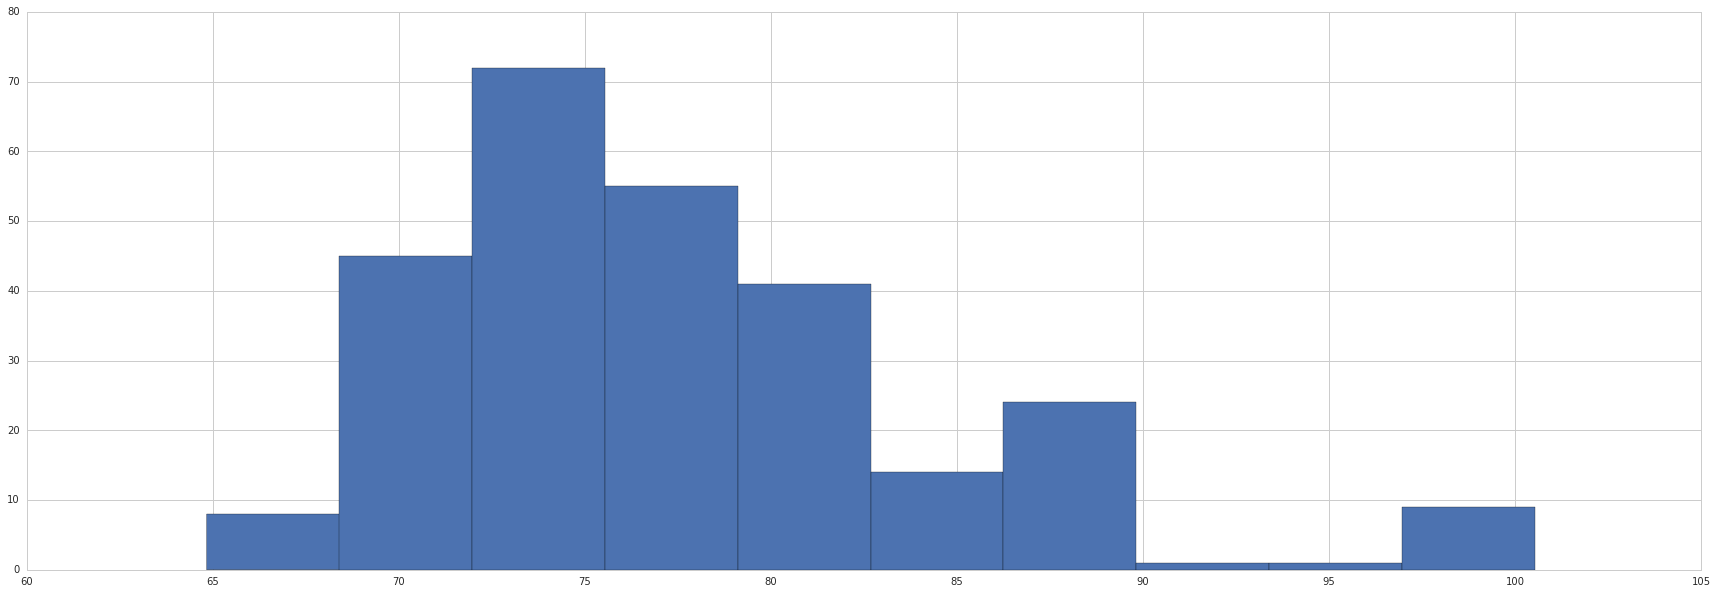

In [673]:
data.High_Temp.hist()

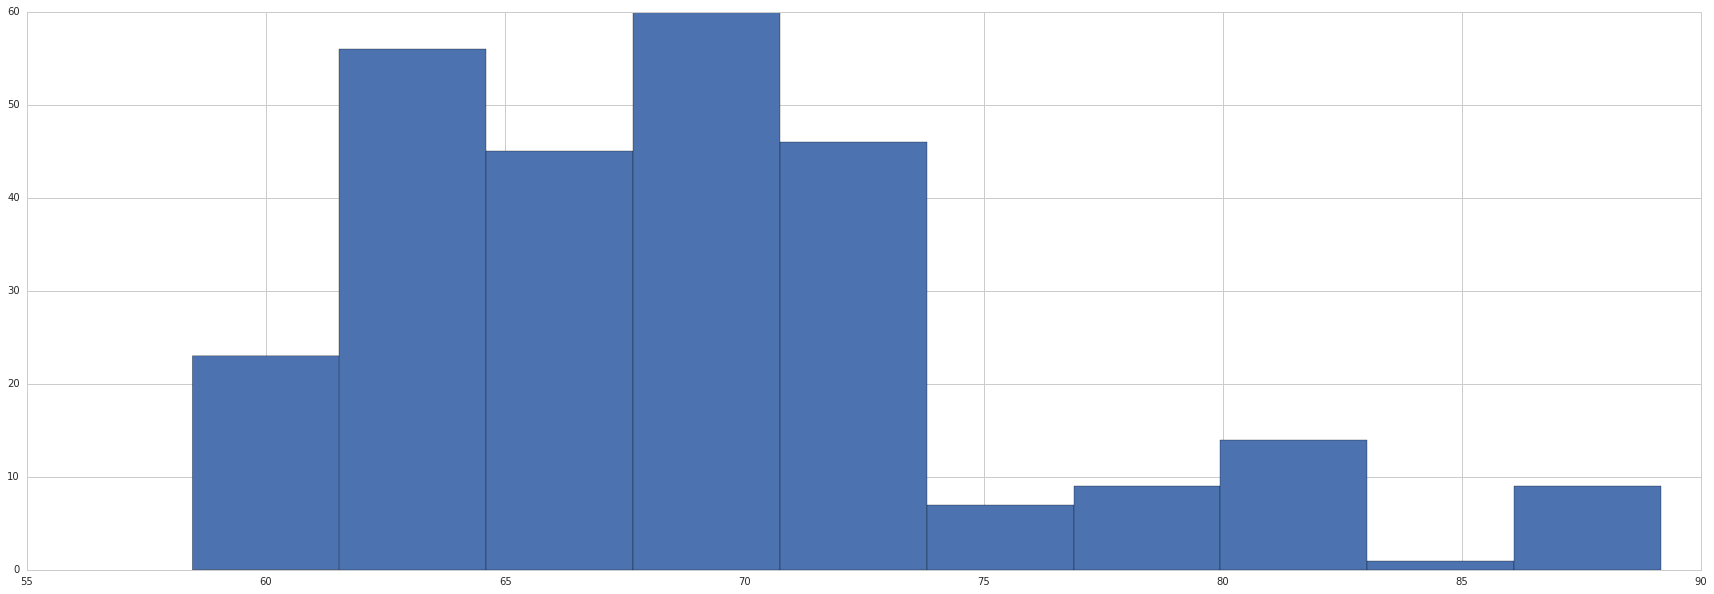

In [674]:
data.Avg_Temp.hist()

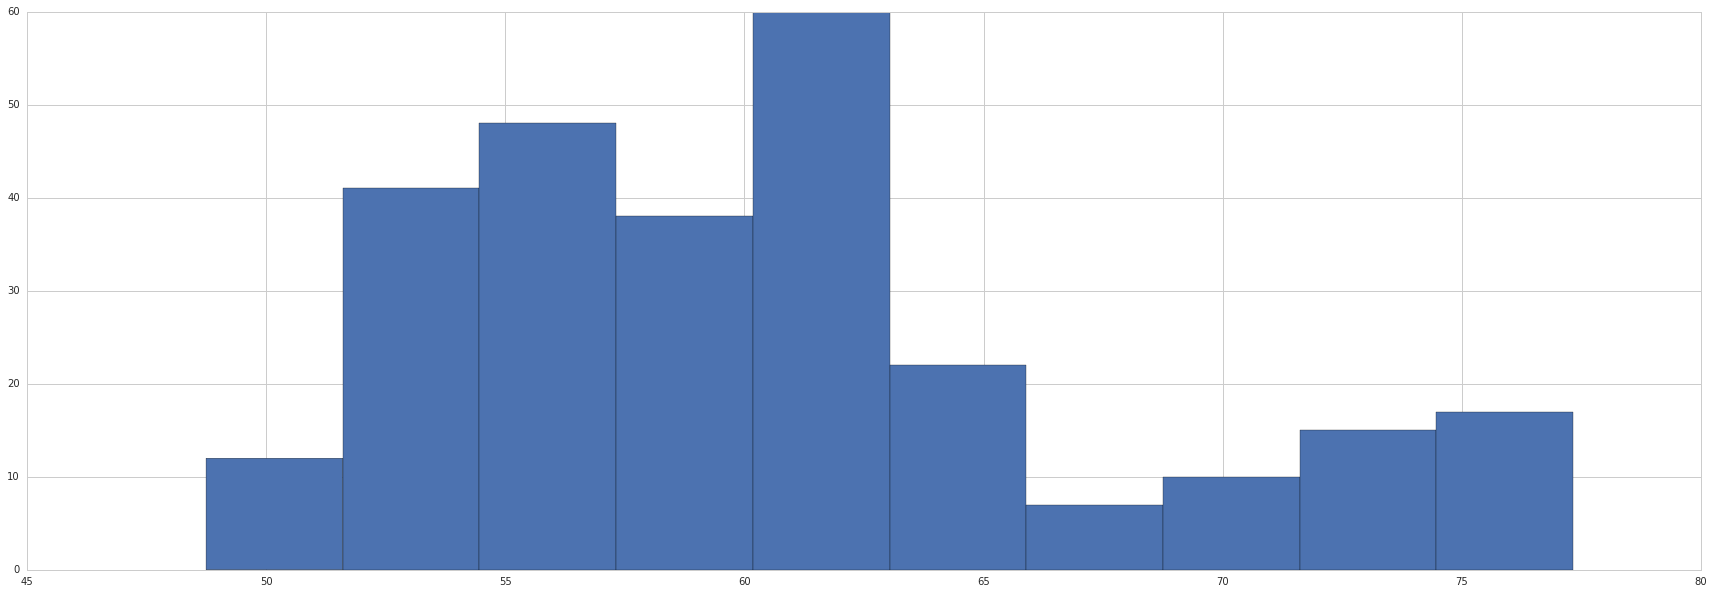

In [675]:
data.Low_Temp.hist()

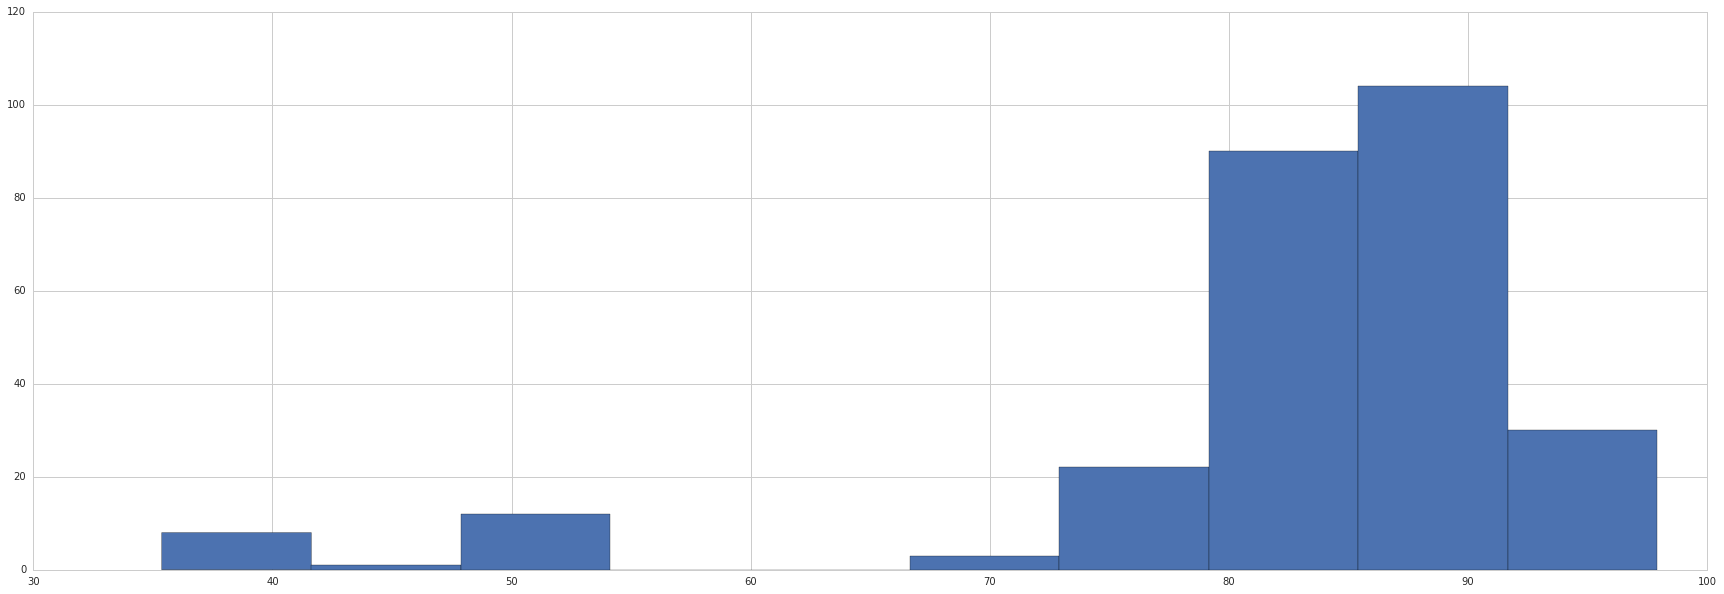

In [676]:
data.Max_Humidity.hist()

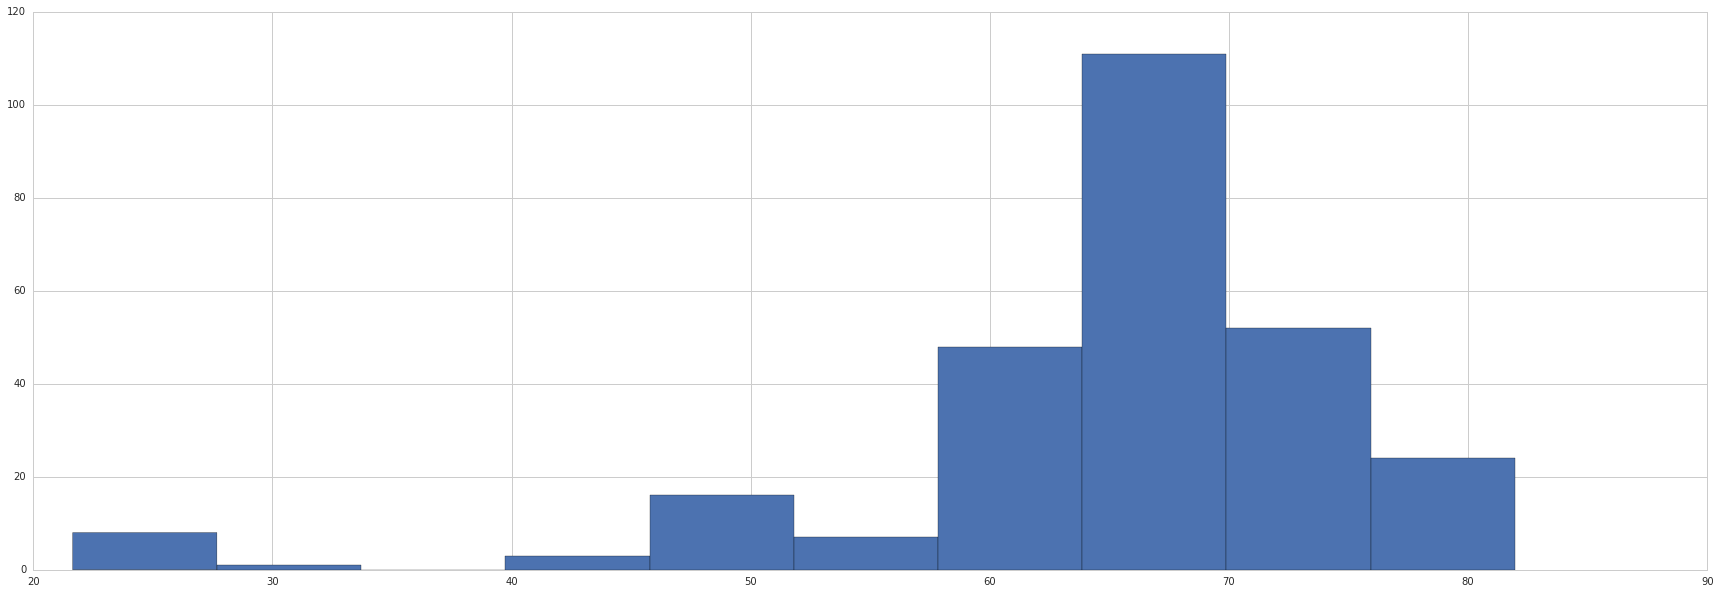

In [677]:
data.Avg_Humidity.hist()

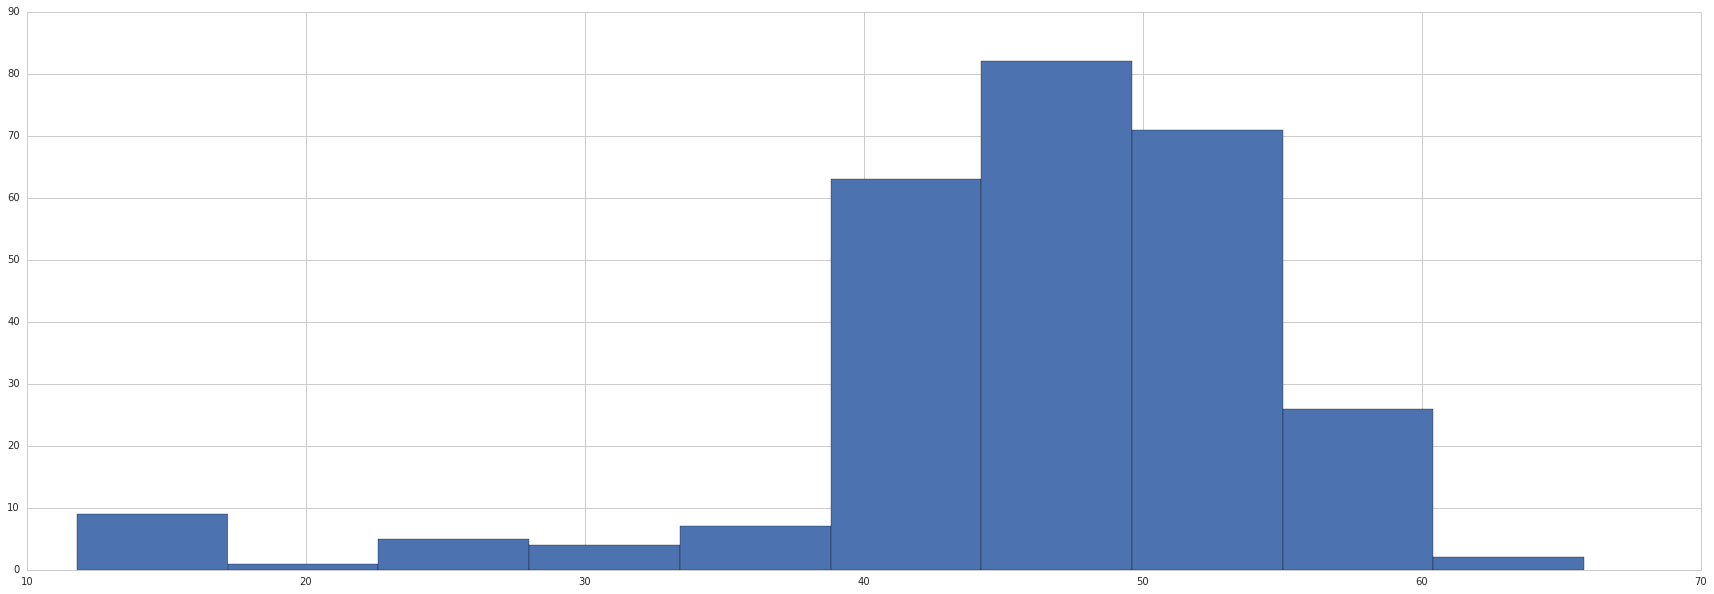

In [678]:
data.Low_Humidity.hist()

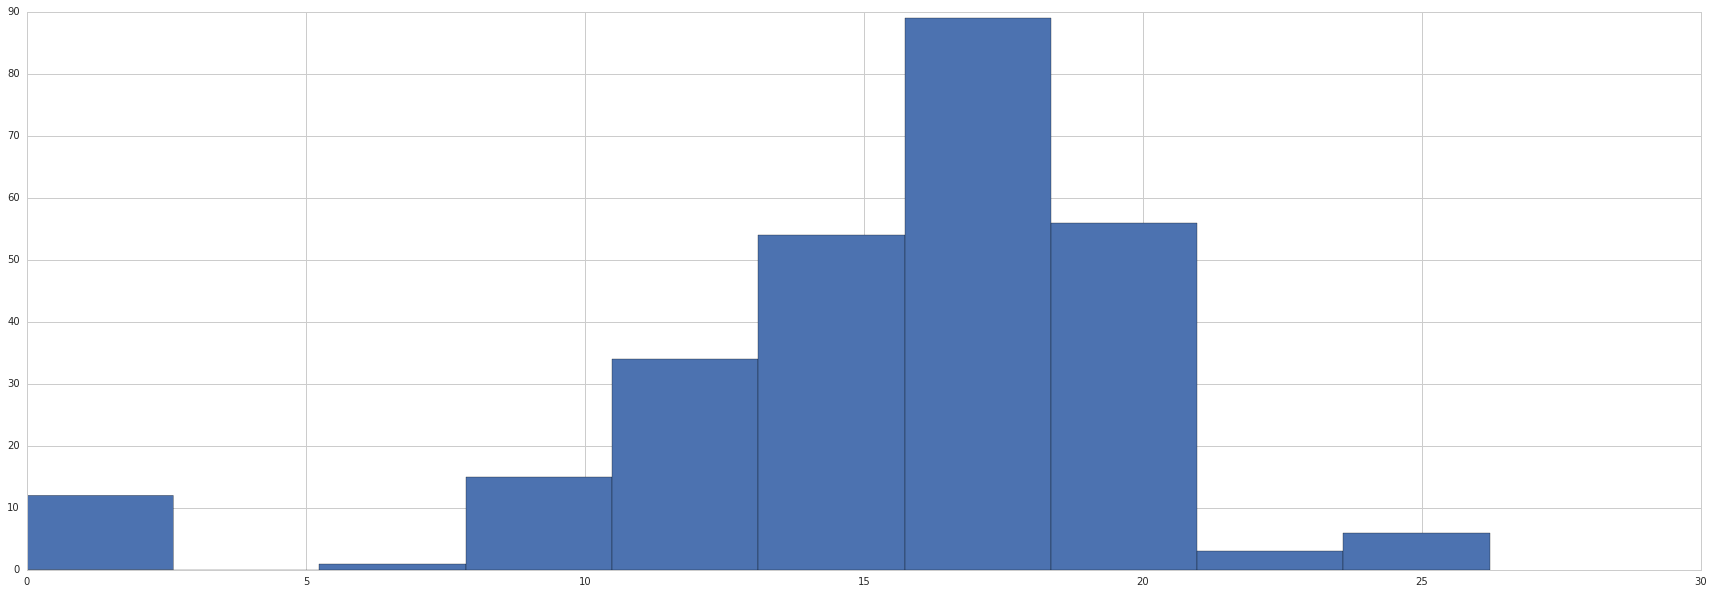

In [679]:
data.High_Wind.hist()

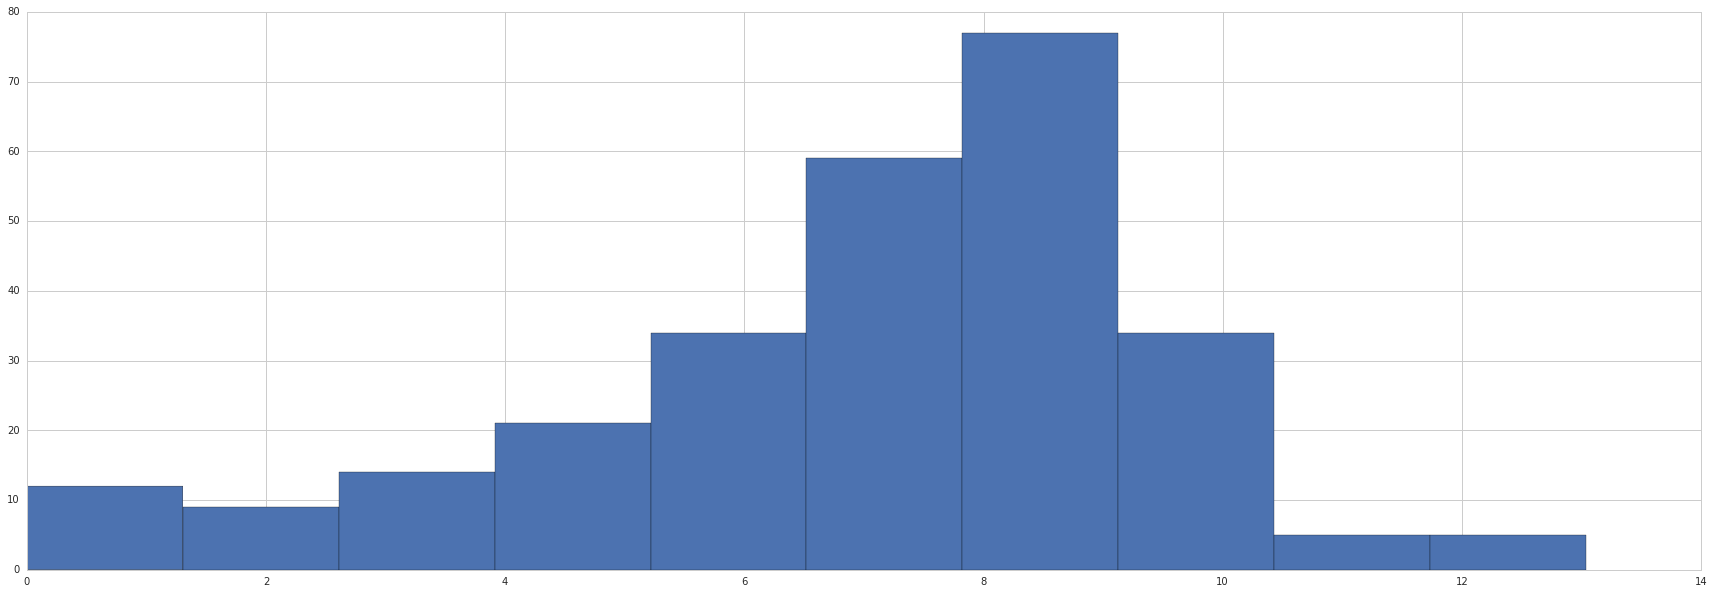

In [680]:
data.Avg_Wind.hist()

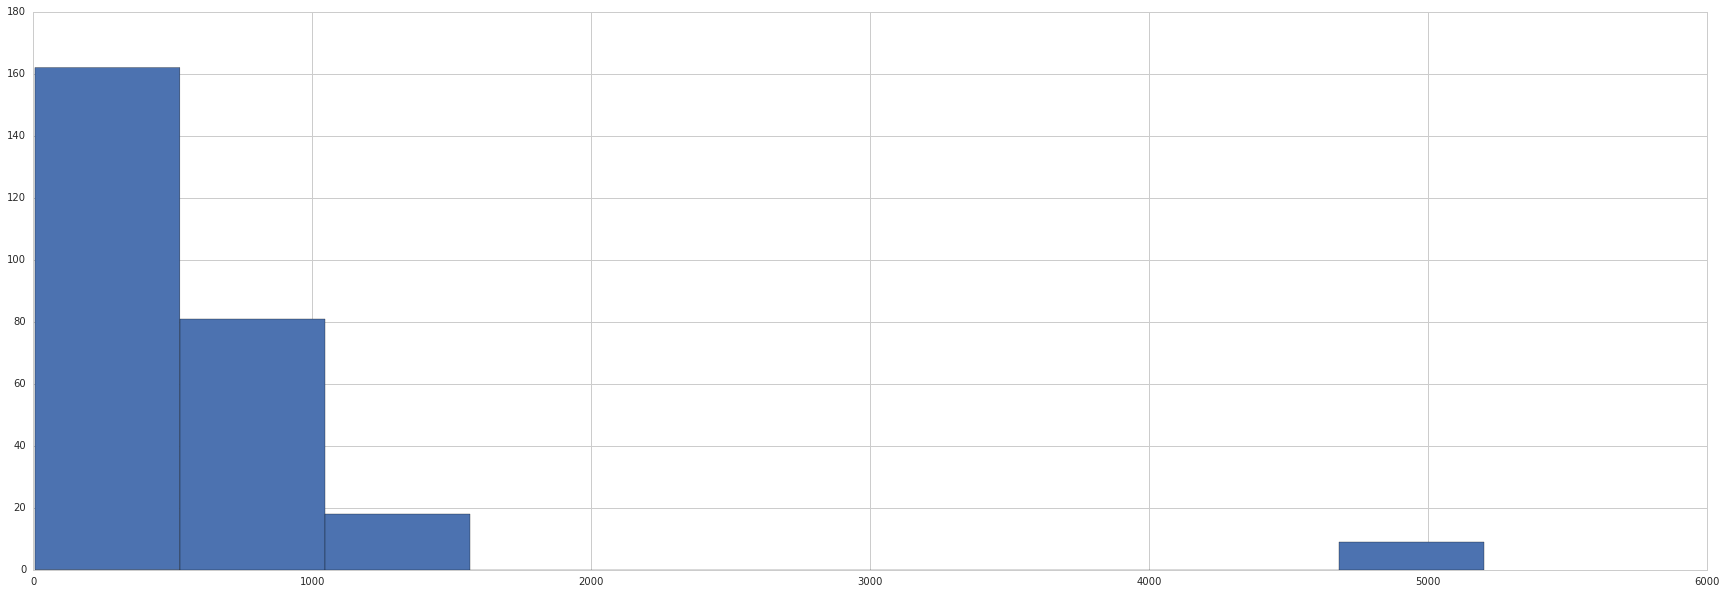

In [681]:
data.Elevation.hist()

In [682]:
avgFair = data.Fair_Territory.mean()
avgFair

110.00988593155887

In [683]:
data.Fair_Territory = data.Fair_Territory.fillna(value=avgFair)

In [684]:
avgFoul = data.Foul_Territory.mean()
avgFoul

24.27870722433458

In [685]:
data.Foul_Territory = data.Foul_Territory.fillna(value=avgFoul)

In [686]:
data.drop(['Team'], axis=1, inplace=True)

In [687]:
data.drop(['Park_Factor'], axis=1, inplace=True)
data.drop(['Home_Games'], axis=1, inplace=True)
data.drop(['Away_Games'], axis=1, inplace=True)
data.drop(['Runs_Scored_Away'], axis=1, inplace=True)
data.drop(['Runs_Allowed_Away'], axis=1, inplace=True)
data.drop(['R-Allowed'], axis=1, inplace=True)
data.drop(['R'], axis = 1, inplace=True)

In [688]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(data.describe())

,ERA,TBF,H-Allowed,HR-Allowed,AVG-Against,SLG-Against,PA,H,HR,RBI,AVG,SLG,Left_Field,Left_Center,Center,Right_Center,Right_Field,Left_Field_Wall,Center_Field_Wall,Right_Field_Wall,Backstop,Fair_Territory,Foul_Territory,High_Temp,Avg_Temp,Low_Temp,Max_Humidity,Avg_Humidity,Low_Humidity,High_Wind,Avg_Wind,Elevation
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,4.148148,3181.140741,737.203704,83.685185,0.254863,0.409996,3063.992593,729.533333,85.262963,367.596296,0.268807,0.429007,331.529630,371.466667,404.262963,373.900000,328.959259,11.209259,9.112963,11.320370,53.059259,110.009886,24.278707,77.481544,68.937100,60.604108,82.680198,65.045626,46.043010,15.385373,7.004044,538.574444
std,0.596015,73.314028,54.875858,16.692077,0.014815,0.031706,64.669132,51.356224,21.428565,49.985016,0.015087,0.034154,9.642545,11.201633,8.481848,8.078679,10.806261,7.500663,3.600033,5.499928,5.487076,3.482678,4.502284,7.032975,6.492758,6.719579,12.098217,10.241296,9.106447,4.639360,2.610198,931.914575
min,2.760000,2998.000000,598.000000,42.000000,0.219000,0.333000,2861.000000,567.000000,35.000000,229.000000,0.219000,0.322000,310.000000,335.000000,390.000000,352.000000,302.000000,4.000000,6.000000,4.000000,43.000000,105.000000,18.100000,64.831522,58.459016,48.744565,35.369565,21.646739,11.793478,0.000000,0.000000,5.900000
25%,3.762500,3138.000000,702.250000,72.000000,0.244250,0.391000,3022.000000,696.000000,69.000000,332.000000,0.259000,0.406000,328.000000,365.000000,400.000000,370.000000,325.000000,8.000000,8.000000,8.000000,50.000000,107.500000,21.600000,72.115489,64.264946,55.792120,81.360054,62.847826,43.051630,13.629076,5.925272,39.000000
50%,4.110000,3179.000000,733.500000,82.000000,0.254500,0.409000,3058.500000,727.000000,83.000000,367.500000,0.268000,0.428000,330.000000,371.000000,401.000000,375.000000,330.000000,8.000000,8.000000,8.000000,53.000000,109.500000,23.600000,76.296196,68.206522,59.899457,85.326087,66.500000,46.939889,16.266304,7.603261,357.000000
75%,4.510000,3227.000000,775.750000,93.000000,0.266000,0.430000,3106.000000,764.750000,98.000000,399.000000,0.279000,0.451000,336.000000,380.000000,408.000000,376.000000,335.000000,12.000000,9.000000,14.000000,55.000000,112.100000,25.300000,80.804348,72.000000,63.173913,89.110054,70.508152,51.331522,18.230978,8.639946,644.000000
max,6.270000,3441.000000,906.000000,135.000000,0.300000,0.501000,3276.000000,902.000000,153.000000,519.000000,0.316000,0.528000,355.000000,390.000000,436.000000,390.000000,353.000000,37.000000,25.000000,25.000000,73.000000,119.200000,40.700000,100.527174,89.163043,77.326087,97.913043,81.945652,65.809783,26.211957,13.038043,5200.000000


In [689]:
data.drop(['ERA'], axis=1, inplace=True)
data.drop(['TBF'], axis=1, inplace=True)
data.drop(['PA'], axis=1, inplace=True)
data.drop(['RBI'], axis=1, inplace=True)

In [690]:
dummies = pd.get_dummies(data['Hitters_Park'], prefix='Hitters_Park')
y = dummies['Hitters_Park_Yes']

In [691]:
data.drop(['Hitters_Park'], axis=1, inplace=True)

In [692]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)

In [693]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [694]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [695]:
best_rfc = estimator.best_estimator_

In [696]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.703703703704


In [697]:
y_hat = best_rfc.predict(X_test)
y_hat

array([ 0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  1.])

In [698]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

        0.0       0.70      0.70      0.70        27
        1.0       0.70      0.70      0.70        27

avg / total       0.70      0.70      0.70        54



In [699]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[19  8]
 [ 8 19]]


In [700]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.786008230453


In [701]:
scores = cross_validation.cross_val_score(best_rfc, data, y, cv=10)
scores

array([ 0.57142857,  0.59259259,  0.62962963,  0.74074074,  0.51851852,
        0.55555556,  0.88888889,  0.92592593,  0.51851852,  0.57692308])

In [702]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci = 2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/- %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)
    

Score is 0.651872 +/- 0.101190
95 percent probability that if this experiment were repeated over and over the average score would be between 0.550682 and 0.753062


In [703]:
dataTest = pd.read_csv("Baseball Stats Final Project Test.csv")
dataTest

,Team,ERA,TBF,H-Allowed,R-Allowed,HR-Allowed,AVG-Against,SLG-Against,PA,H,...,Foul_Territory,Max_Temperature,Avg_Temperature,Min_Temperature,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind,Avg_Wind,Elevation
0,Angels,2.82,3085,618,251,39,0.221,0.327,2961,664,...,21.5,79.239130,70.059783,60.375000,83.168478,63.923913,44.173913,11.413043,3.521739,157
1,Angels,3.44,3003,638,309,79,0.230,0.367,2914,720,...,21.5,83.983696,74.260870,64.021739,76.304348,57.461957,38.135870,11.413043,3.331522,157
2,Angels,4.13,3227,745,371,80,0.254,0.397,3068,741,...,21.5,83.500000,74.244565,64.500000,75.217391,57.369565,38.994565,11.559783,3.554348,157
3,Angels,3.39,3164,672,310,55,0.231,0.341,3087,701,...,21.5,84.146739,74.298913,63.951087,78.027174,57.880435,37.201087,12.630435,4.070652,157
4,Angels,4.68,3006,713,377,96,0.259,0.434,2926,659,...,21.5,82.625000,73.630435,64.152174,79.609890,60.450549,40.686813,12.250000,3.880435,157
5,Astros,2.83,3074,642,253,56,0.225,0.338,3059,727,...,21.0,88.000000,83.532609,72.266304,86.500000,61.782609,36.619565,21.244565,6.896739,43
6,Astros,3.81,3180,726,355,79,0.250,0.396,2988,636,...,21.0,88.000000,81.032609,71.380435,91.163043,69.184783,46.679348,18.081522,5.538043,43
7,Astros,4.99,3334,801,457,106,0.270,0.449,2983,627,...,21.0,88.000000,79.951087,69.885870,93.744565,70.777174,47.369565,19.728261,6.125000,43
8,Astros,4.04,3136,726,362,73,0.253,0.398,2978,655,...,21.0,88.000000,79.434783,70.027174,93.527174,72.000000,50.000000,18.885870,6.114130,43
9,Astros,3.95,2958,662,337,78,0.245,0.393,2917,658,...,21.0,88.000000,80.722826,71.380435,94.956522,74.010870,52.521739,18.434783,5.592391,43


In [704]:
y_Team = dataTest['Team']
dataTest.drop(['Team'], axis=1, inplace=True)
dataTest.drop(['Park_Factor'], axis=1, inplace=True)
dataTest.drop(['Home_Games'], axis=1, inplace=True)
dataTest.drop(['Away_Games'], axis=1, inplace=True)
dataTest.drop(['Runs_Scored_Away'], axis=1, inplace=True)
dataTest.drop(['R-Allowed'], axis=1, inplace=True)
dataTest.drop(['R'], axis=1, inplace=True)

In [705]:
dataTest.drop(['Runs_Allowed_Away'], axis=1, inplace=True)

In [706]:
dataTest.drop(['ERA'], axis=1, inplace=True)
dataTest.drop(['TBF'], axis=1, inplace=True)
dataTest.drop(['PA'], axis=1, inplace=True)
dataTest.drop(['RBI'], axis=1, inplace=True)

In [707]:
dummies = pd.get_dummies(dataTest['Hitters_Park'], prefix='Hitters_Park')
dummies

,Hitters_Park_No,Hitters_Park_Yes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,0,1
8,0,1
9,0,1


In [708]:
yTest = dummies.pop('Hitters_Park_Yes')

In [709]:
dataTest.drop(['Hitters_Park'], axis=1, inplace=True)

In [710]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(data.describe())

,H-Allowed,HR-Allowed,AVG-Against,SLG-Against,H,HR,AVG,SLG,Left_Field,Left_Center,Center,Right_Center,Right_Field,Left_Field_Wall,Center_Field_Wall,Right_Field_Wall,Backstop,Fair_Territory,Foul_Territory,High_Temp,Avg_Temp,Low_Temp,Max_Humidity,Avg_Humidity,Low_Humidity,High_Wind,Avg_Wind,Elevation
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,737.203704,83.685185,0.254863,0.409996,729.533333,85.262963,0.268807,0.429007,331.529630,371.466667,404.262963,373.900000,328.959259,11.209259,9.112963,11.320370,53.059259,110.009886,24.278707,77.481544,68.937100,60.604108,82.680198,65.045626,46.043010,15.385373,7.004044,538.574444
std,54.875858,16.692077,0.014815,0.031706,51.356224,21.428565,0.015087,0.034154,9.642545,11.201633,8.481848,8.078679,10.806261,7.500663,3.600033,5.499928,5.487076,3.482678,4.502284,7.032975,6.492758,6.719579,12.098217,10.241296,9.106447,4.639360,2.610198,931.914575
min,598.000000,42.000000,0.219000,0.333000,567.000000,35.000000,0.219000,0.322000,310.000000,335.000000,390.000000,352.000000,302.000000,4.000000,6.000000,4.000000,43.000000,105.000000,18.100000,64.831522,58.459016,48.744565,35.369565,21.646739,11.793478,0.000000,0.000000,5.900000
25%,702.250000,72.000000,0.244250,0.391000,696.000000,69.000000,0.259000,0.406000,328.000000,365.000000,400.000000,370.000000,325.000000,8.000000,8.000000,8.000000,50.000000,107.500000,21.600000,72.115489,64.264946,55.792120,81.360054,62.847826,43.051630,13.629076,5.925272,39.000000
50%,733.500000,82.000000,0.254500,0.409000,727.000000,83.000000,0.268000,0.428000,330.000000,371.000000,401.000000,375.000000,330.000000,8.000000,8.000000,8.000000,53.000000,109.500000,23.600000,76.296196,68.206522,59.899457,85.326087,66.500000,46.939889,16.266304,7.603261,357.000000
75%,775.750000,93.000000,0.266000,0.430000,764.750000,98.000000,0.279000,0.451000,336.000000,380.000000,408.000000,376.000000,335.000000,12.000000,9.000000,14.000000,55.000000,112.100000,25.300000,80.804348,72.000000,63.173913,89.110054,70.508152,51.331522,18.230978,8.639946,644.000000
max,906.000000,135.000000,0.300000,0.501000,902.000000,153.000000,0.316000,0.528000,355.000000,390.000000,436.000000,390.000000,353.000000,37.000000,25.000000,25.000000,73.000000,119.200000,40.700000,100.527174,89.163043,77.326087,97.913043,81.945652,65.809783,26.211957,13.038043,5200.000000


In [711]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(dataTest.describe())

,H-Allowed,HR-Allowed,AVG-Against,SLG-Against,H,HR,AVG,SLG,Left_Field,Left_Center,Center,Right_Center,Right_Field,Left_Field_Wall,Center_Field_Wall,Right_Field_Wall,Backstop,Fair_Territory,Foul_Territory,Max_Temperature,Avg_Temperature,Min_Temperature,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind,Avg_Wind,Elevation
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,705.153333,77.426667,0.247807,0.394100,695.633333,77.766667,0.257793,0.406453,332.406667,372.200000,404.286667,374.506667,328.933333,10.603333,9.303333,11.336667,51.746667,110.034000,23.503333,78.286746,69.791527,61.072107,81.691903,63.788881,44.588221,16.465667,7.098636,533.963333
std,53.518201,17.135601,0.015563,0.034619,57.681772,21.442108,0.017255,0.036760,9.989993,11.302432,8.743425,8.015712,10.849592,6.577187,3.684220,5.463269,4.484405,3.555973,4.175390,7.070370,6.553686,6.606318,11.411315,9.510606,8.946571,4.702930,2.598741,932.446025
min,583.000000,37.000000,0.215000,0.312000,571.000000,31.000000,0.219000,0.329000,310.000000,335.000000,390.000000,355.000000,302.000000,4.000000,6.000000,4.000000,43.000000,105.000000,18.100000,66.211957,58.701087,48.592391,35.695652,23.788043,11.347826,0.000000,0.000000,5.900000
25%,670.500000,65.250000,0.237000,0.369000,659.000000,62.000000,0.248000,0.383000,328.000000,365.000000,400.000000,370.000000,325.000000,8.000000,8.000000,8.000000,50.000000,107.800000,21.000000,73.399457,65.196638,56.451087,80.438859,61.373641,40.744565,14.277174,5.813859,39.000000
50%,701.000000,77.000000,0.248500,0.396000,690.500000,76.000000,0.256000,0.402000,331.000000,375.000000,401.000000,375.000000,330.000000,8.000000,8.000000,8.000000,52.000000,109.100000,23.600000,76.652174,69.019022,60.062500,84.084239,65.220109,45.445652,17.372283,7.543478,357.000000
75%,739.000000,90.000000,0.257750,0.422000,722.750000,90.000000,0.267000,0.427500,339.000000,380.000000,408.000000,378.000000,335.000000,11.000000,9.000000,14.000000,55.000000,112.100000,25.000000,81.607337,72.402174,64.107337,86.615489,69.229620,50.044837,19.582880,8.994565,617.000000
max,909.000000,119.000000,0.299000,0.502000,924.000000,138.000000,0.322000,0.529000,355.000000,390.000000,436.000000,392.000000,353.000000,37.000000,25.000000,25.000000,60.000000,119.200000,40.700000,100.543478,89.108696,77.184783,97.918478,80.385870,58.184783,26.385870,12.923913,5200.000000


In [712]:
accuracy = accuracy_score(yTest, best_rfc.predict(dataTest))
print "Accuracy: ", accuracy

Accuracy:  0.713333333333


In [713]:
from pandas import DataFrame
df = DataFrame({'Team': y_Team, 'Hitters_Park': yTest, 'Prediction': best_rfc.predict(dataTest)})

In [714]:
columns = ['Team', 'Formula', 'Prediction']
graph = pd.DataFrame(columns = columns)

In [715]:
graph.loc[0] = ['Angels', sum(df[df.Team == 'Angels'].Hitters_Park)/5*100, sum(df[df.Team == 'Angels'].Prediction)/5*100]
graph.loc[1] = ['Astros', sum(df[df.Team == 'Astros'].Hitters_Park)/5*100, sum(df[df.Team == 'Astros'].Prediction)/5*100]
graph.loc[2] = ['Athletics', sum(df[df.Team == 'Athletics'].Hitters_Park)/5*100, sum(df[df.Team == 'Athletics'].Prediction)/5*100]
graph.loc[3] = ['Blue Jays', sum(df[df.Team == 'Blue Jays'].Hitters_Park)/5*100, sum(df[df.Team == 'Blue Jays'].Prediction)/5*100]
graph.loc[4] = ['Braves', sum(df[df.Team == 'Braves'].Hitters_Park)/5*100, sum(df[df.Team == 'Braves'].Prediction)/5*100]
graph.loc[5] = ['Brewers', sum(df[df.Team == 'Brewers'].Hitters_Park)/5*100, sum(df[df.Team == 'Brewers'].Prediction)/5*100]
graph.loc[6] = ['Cardinals', sum(df[df.Team == 'Cardinals'].Hitters_Park)/5*100, sum(df[df.Team == 'Cardinals'].Prediction)/5*100]
graph.loc[7] = ['Cubs', sum(df[df.Team == 'Cubs'].Hitters_Park)/5*100, sum(df[df.Team == 'Cubs'].Prediction)/5*100]
graph.loc[8] = ['Diamondsbacks', sum(df[df.Team == 'Diamondbacks'].Hitters_Park)/5*100, sum(df[df.Team == 'Diamondbacks'].Prediction)/5*100]
graph.loc[9] = ['Dodgers', sum(df[df.Team == 'Dodgers'].Hitters_Park)/5*100, sum(df[df.Team == 'Dodgers'].Prediction)/5*100]
graph.loc[10] = ['Giants', sum(df[df.Team == 'Giants'].Hitters_Park)/5*100, sum(df[df.Team == 'Giants'].Prediction)/5*100]
graph.loc[11] = ['Indians', sum(df[df.Team == 'Indians'].Hitters_Park)/5*100, sum(df[df.Team == 'Indians'].Prediction)/5*100]
graph.loc[12] = ['Mariners', sum(df[df.Team == 'Mariners'].Hitters_Park)/5*100, sum(df[df.Team == 'Mariners'].Prediction)/5*100]
graph.loc[13] = ['Marlins', sum(df[df.Team == 'Marlins'].Hitters_Park)/5*100, sum(df[df.Team == 'Marlins'].Prediction)/5*100]
graph.loc[14] = ['Mets', sum(df[df.Team == 'Mets'].Hitters_Park)/5*100, sum(df[df.Team == 'Mets'].Prediction)/5*100]
graph.loc[15] = ['Nationals', sum(df[df.Team == 'Nationals'].Hitters_Park)/5*100, sum(df[df.Team == 'Nationals'].Prediction)/5*100]
graph.loc[16] = ['Orioles', sum(df[df.Team == 'Orioles'].Hitters_Park)/5*100, sum(df[df.Team == 'Orioles'].Prediction)/5*100]
graph.loc[17] = ['Padres', sum(df[df.Team == 'Padres'].Hitters_Park)/5*100, sum(df[df.Team == 'Padres'].Prediction)/5*100]
graph.loc[18] = ['Phillies', sum(df[df.Team == 'Phillies'].Hitters_Park)/5*100, sum(df[df.Team == 'Phillies'].Prediction)/5*100]
graph.loc[19] = ['Pirates', sum(df[df.Team == 'Pirates'].Hitters_Park)/5*100, sum(df[df.Team == 'Pirates'].Prediction)/5*100]
graph.loc[20] = ['Rangers', sum(df[df.Team == 'Rangers'].Hitters_Park)/5*100, sum(df[df.Team == 'Rangers'].Prediction)/5*100]
graph.loc[21] = ['Rays', sum(df[df.Team == 'Rays'].Hitters_Park)/5*100, sum(df[df.Team == 'Rays'].Prediction)/5*100]
graph.loc[22] = ['Red Sox', sum(df[df.Team == 'Red Sox'].Hitters_Park)/5*100, sum(df[df.Team == 'Red Sox'].Prediction)/5*100]
graph.loc[23] = ['Reds', sum(df[df.Team == 'Reds'].Hitters_Park)/5*100, sum(df[df.Team == 'Reds'].Prediction)/5*100]
graph.loc[24] = ['Rockies', sum(df[df.Team == 'Rockies'].Hitters_Park)/5*100, sum(df[df.Team == 'Rockies'].Prediction)/5*100]
graph.loc[25] = ['Royals', sum(df[df.Team == 'Royals'].Hitters_Park)/5*100, sum(df[df.Team == 'Royals'].Prediction)/5*100]
graph.loc[26] = ['Tigers', sum(df[df.Team == 'Tigers'].Hitters_Park)/5*100, sum(df[df.Team == 'Tigers'].Prediction)/5*100]
graph.loc[27] = ['Twins', sum(df[df.Team == 'Twins'].Hitters_Park)/5*100, sum(df[df.Team == 'Twins'].Prediction)/5*100]
graph.loc[28] = ['White Sox', sum(df[df.Team == 'White Sox'].Hitters_Park)/5*100, sum(df[df.Team == 'White Sox'].Prediction)/5*100]
graph.loc[29] = ['Yankees', sum(df[df.Team == 'Yankees'].Hitters_Park)/5*100, sum(df[df.Team == 'Yankees'].Prediction)/5*100]
graph

,Team,Formula,Prediction
0,Angels,0,0
1,Astros,60,40
2,Athletics,40,0
3,Blue Jays,60,20
4,Braves,20,20
5,Brewers,100,20
6,Cardinals,20,20
7,Cubs,20,40
8,Diamondsbacks,80,100
9,Dodgers,20,0


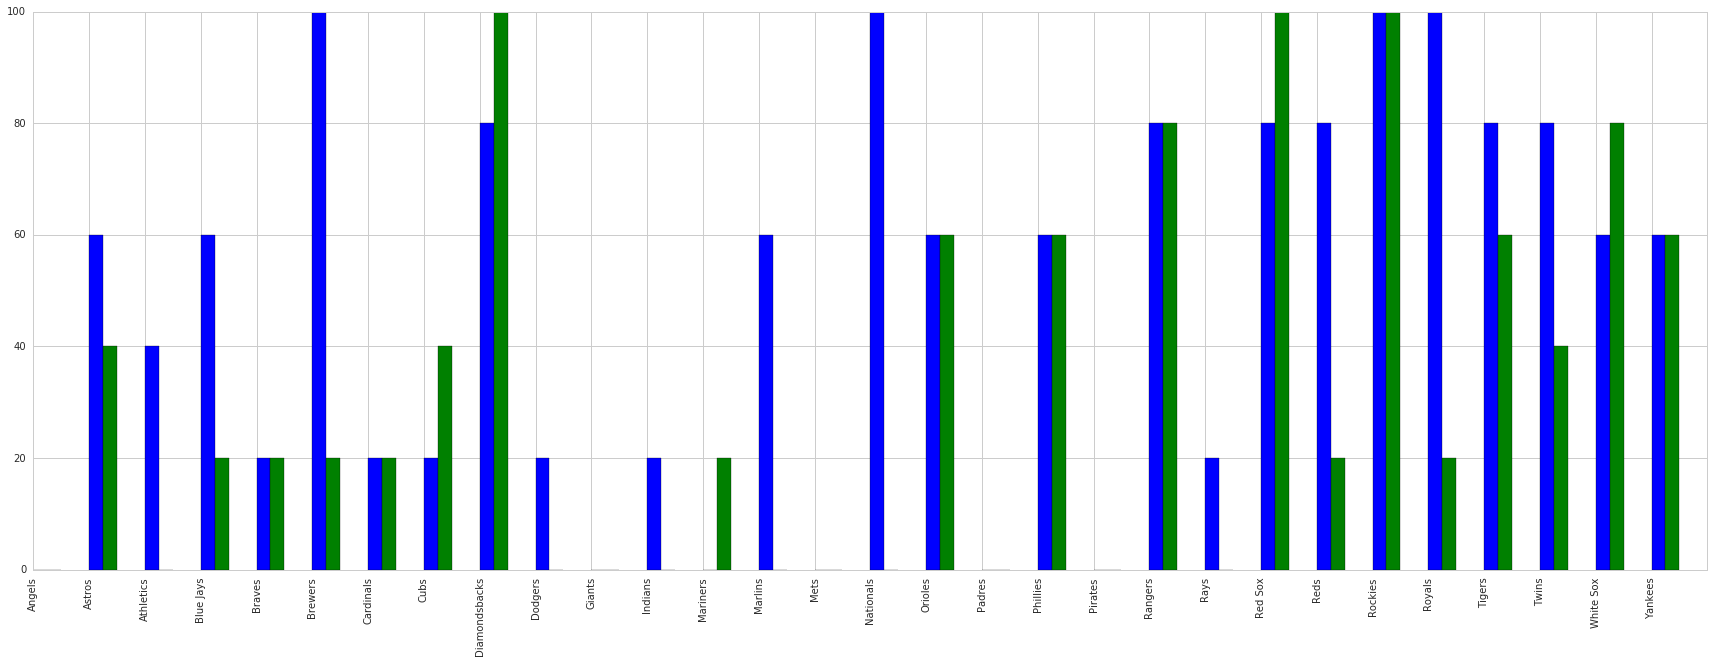

In [716]:
X = np.arange(30)
plt.figure(figsize(30,10))
plt.bar(X + 0.00, graph['Formula'], color = 'b', width = 0.25)
plt.bar(X + 0.25, graph['Prediction'], color = 'g', width = 0.25)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29],graph['Team'])
plt.xticks(rotation=90)
plt.show()

In [717]:
print classification_report(yTest, best_rfc.predict(dataTest))

             precision    recall  f1-score   support

        0.0       0.67      0.88      0.76        77
        1.0       0.81      0.53      0.64        73

avg / total       0.74      0.71      0.70       150



In [718]:
roc = roc_auc_score(yTest, best_rfc.predict_proba(dataTest)[:,1])
print "AUC Score: ", roc

AUC Score:  0.79558797367


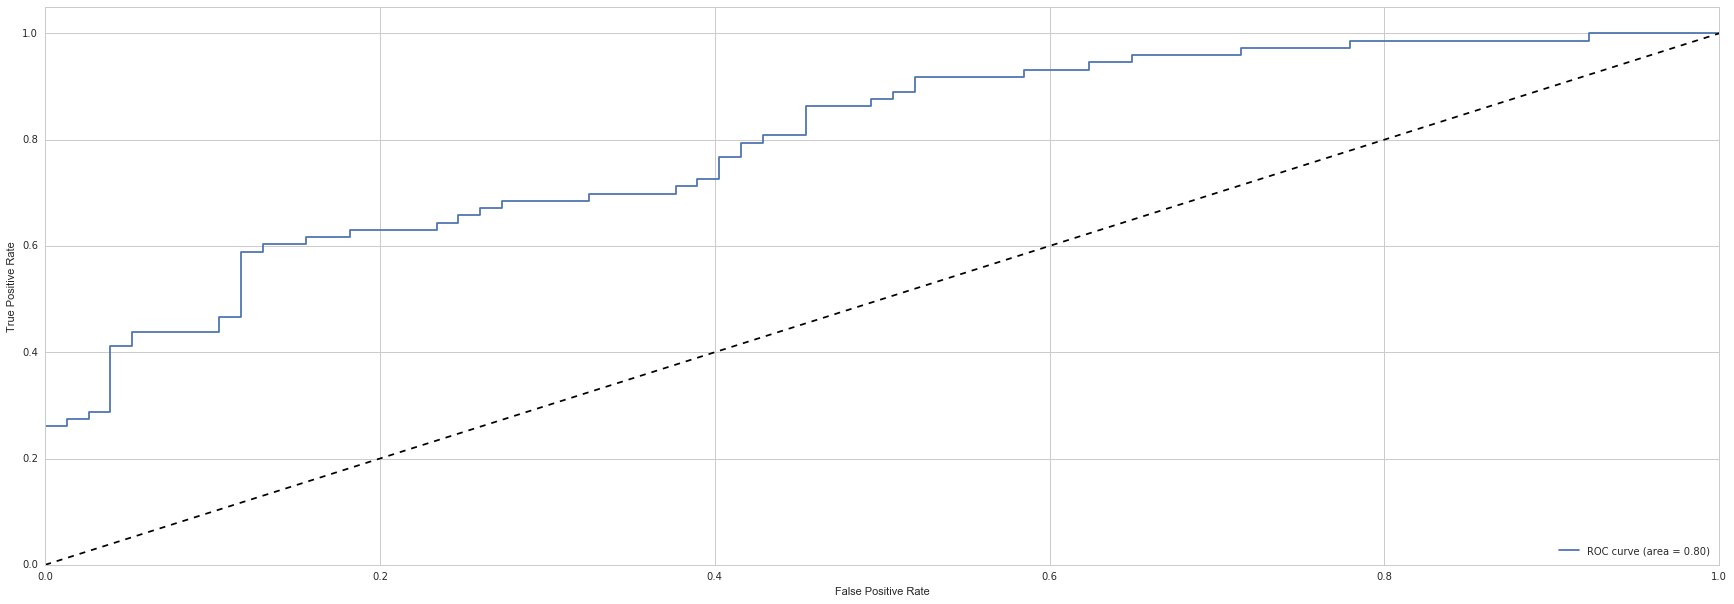

In [723]:
fpr, tpr, thresholds = roc_curve(yTest, best_rfc.predict_proba(dataTest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %roc)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [720]:
scores = cross_validation.cross_val_score(best_rfc, dataTest, yTest, cv=10)
scores

array([ 0.6875    ,  0.5625    ,  0.375     ,  0.6       ,  0.6       ,
        0.53333333,  0.8       ,  0.78571429,  0.64285714,  0.71428571])

In [721]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci = 2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/- %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)
    

Score is 0.630119 +/- 0.085970
95 percent probability that if this experiment were repeated over and over the average score would be between 0.544149 and 0.716089
